# **Urgency Bias dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
purchases_df

_1NDq0rxoUSu6oyz
2020-12-17 17.58  1.0 MA  rivmount Ski Snow Gloves Men Women, Waterproof ... B07WRC7LKR APPAREL               R_1NDq0rxoUSu6oyz
           18.99  1.0 MA  Momoon Kids Winter Gloves Toddler Snow Gloves 2... B07Z3CR6RJ SPORT_ACTIVITY_GLOVE  R_1NDq0rxoUSu6oyz
           29.99  1.0 MA  Arctix unisex-child Insulated Snow Bib Overalls    B004D9BQWA SNOW_PANT             R_1NDq0rxoUSu6oyz
           17.99  1.0 MA  Momoon Kids Winter Gloves Toddler Snow Gloves 2... B07Z3CTVGW SPORT_ACTIVITY_GLOVE  R_1NDq0rxoUSu6oyz
2020-12-19 115.99 1.0 MA  Innova Inversion Table with Adjustable Headrest... B003QCI4GG SPORTING_GOODS        R_1NDq0rxoUSu6oyz
...                                                                                                                         ...
2021-04-01 6.99   1.0 MA  Tanner's Tasty Paste Vanilla Bling - Anticavity... B015ZRTHVA TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb
2021-04-14 15.99  1.0 MA  Sinland Microfiber Cleaning Cloth Dish Cloth Ki... B00QGCXPRG TOWEL                 R_zfqnsBzlOAKibzb
2021-05-22 6.99   4.0 MA  Tanner's Tasty Paste Vanilla Bling - Anticavity... B015ZRTHVA TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb
2021-12-01 6.99   4.0 MA  Tanner's Tasty Paste Vanilla Bling - Anticavity... B015ZRTHVA TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb
2022-09-19 19.99  1.0 NaN Wild Mystic Oracle Card Deck: A 50-Card Deck an... 1441337652 ABIS_BOOK             R_zfqnsBzlOAKibzb

[1666460 rows x 1 columns]

In [ ]:
sample_df = purchases_df.sample(frac=0.1, random_state=42)

In [ ]:
sample_df.shape

(166646, 1)

In [ ]:
sample_df.to_csv('amazon-purchases-sample.csv', index=False)

In [ ]:
import pandas as pd

In [ ]:
sample_df = pd.read_csv('amazon-purchases-sample.csv')

In [ ]:
sample_df.head()

Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0  2021-02-06                     9.99       1.0                     CT   
1  2020-01-12                    13.98       1.0                     NY   
2  2018-01-27                     7.98       1.0                     PA   
3  2018-10-09                    15.99       1.0                     MN   
4  2019-05-14                    22.99       1.0                     VA   

                                               Title ASIN/ISBN (Product Code)  \
0  ZEBRE Case Compatible with Apple Watch Screen ...               B08Q7Q2KRC   
1  Huggies Natural Care Sensitive Baby Wipes, Uns...               B07M6XVCBY   
2                                                NaN               B008ZZC6S6   
3  LEGO Technic WHACK! 42072 Building Kit with Pu...               B075QYRTXZ   
4                                                NaN               B07DXGBKRH   

             Category  Survey ResponseID  
0    SCREEN_PROTECTOR  R_AhNiHUaRBzQHY1b  
1  SKIN_CLEANING_WIPE  R_2uyQHwENySBamVs  
2                 NaN  R_3k5JabbpW5kTO7M  
3  TOY_BUILDING_BLOCK  R_2pKbiSIpze2jP6t  
4                 NaN  R_1KkFs7rgWXlWf58

In [ ]:
sample_df.shape

(185072, 8)

In [ ]:
sample_df.isnull().sum()

Order Date                     0
Purchase Price Per Unit        0
Quantity                       0
Shipping Address State      8849
Title                       8881
ASIN/ISBN (Product Code)      94
Category                    8842
Survey ResponseID              0
dtype: int64

In [ ]:
df = sample_df.dropna()

In [ ]:
df.shape

(167534, 8)

In [ ]:
sample_df['Order Date']=pd.to_datetime(sample_df['Order Date'])

In [ ]:
# Step 2: Define holiday dates (Black Friday, Thanksgiving, Christmas)
holidays = pd.to_datetime([
    '2018-11-22', '2018-11-23', '2018-12-25',
    '2019-11-28', '2019-11-29', '2019-12-25',
    '2020-11-26', '2020-11-27', '2020-12-25',
    '2021-11-25', '2021-11-26', '2021-12-25',
    '2022-11-24', '2022-11-25', '2022-12-25'
])

In [ ]:
# Step 3: Create is_holiday_purchase flag
sample_df['Holiday Purchase'] = sample_df['Order Date'].isin(holidays).astype(int)

In [ ]:
# Step 4: Compute days_to_nearest_holiday
sample_df['Days to Nearest Holiday'] = sample_df['Order Date'].apply(
    lambda x: min([abs((x - h).days) for h in holidays])
)

In [ ]:
# Step 5: Compute total purchase amount
sample_df['Purchase Amount'] = sample_df['Purchase Price Per Unit'] * sample_df['Quantity']


In [ ]:
# Step 6: Flag high-value purchases (top 10%)
threshold = sample_df['Purchase Amount'].quantile(0.90)
sample_df['High Value Purchase'] = (sample_df['Purchase Amount'] >= threshold).astype(int)


In [ ]:
# Step 7: Purchase volume by day
daily_volume = sample_df['Order Date'].value_counts()
sample_df['Daily Volume'] = sample_df['Order Date'].map(daily_volume)
high_volume_threshold = sample_df['Daily Volume'].quantile(0.90)
sample_df['High Volume Day'] = (sample_df['Daily Volume'] >= high_volume_threshold).astype(int)

In [ ]:
# Step 8: Final urgency label
sample_df['Urgency Label'] = (
    (sample_df['Holiday Purchase'] == 1) |
    (sample_df['High Value Purchase'] == 1) |
    (sample_df['High Volume Day'] == 1)
).astype(int)

In [ ]:
# preview the final dataframe
sample_df[['Order Date', 'Purchase Amount', 'Holiday Purchase', 'Days to Nearest Holiday',
    'High Value Purchase', 'High Volume Day', 'Urgency Label']]

Order Date  Purchase Amount  Holiday Purchase  Days to Nearest Holiday  \
0      2021-02-06             9.99                 0                       43   
1      2020-01-12            13.98                 0                       18   
2      2018-01-27             7.98                 0                      299   
3      2018-10-09            15.99                 0                       44   
4      2019-05-14            22.99                 0                      140   
...           ...              ...               ...                      ...   
185067 2022-07-06             9.98                 0                      141   
185068 2022-02-03            18.99                 0                       40   
185069 2021-11-21            12.95                 0                        4   
185070 2021-03-06             9.97                 0                       71   
185071 2022-10-02             2.59                 0                       53   

        High Value Purchase  High Volume Day  Urgency Label  
0                         0                0              0  
1                         0                0              0  
2                         0                0              0  
3                         0                0              0  
4                         0                0              0  
...                     ...              ...            ...  
185067                    0                0              0  
185068                    0                0              0  
185069                    0                1              1  
185070                    0                0              0  
185071                    0                0              0  

[185072 rows x 7 columns]

In [ ]:
sample_df.to_csv('Urgency Feature Engineered', index=False)

In [ ]:
# Check how many rows have 1s and 0s for each key feature to confirm the issue
summary_counts = {
    'Holiday Purchase': sample_df['Holiday Purchase'].value_counts(),
    'High Value Purchase': sample_df['High Value Purchase'].value_counts(),
    'High Volume Day': sample_df['High Volume Day'].value_counts(),
    'Urgency Label': sample_df['Urgency Label'].value_counts()
}

summary_counts


{'Holiday Purchase': Holiday Purchase
 0    182710
 1      2362
 Name: count, dtype: int64,
 'High Value Purchase': High Value Purchase
 0    166563
 1     18509
 Name: count, dtype: int64,
 'High Volume Day': High Volume Day
 0    166307
 1     18765
 Name: count, dtype: int64,
 'Urgency Label': Urgency Label
 0    149310
 1     35762
 Name: count, dtype: int64}

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
urgency_fe = pd.read_csv('Urgency Feature Engineered')

In [ ]:
urgency_fe.dropna()

Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2021-02-06                     9.99       1.0                     CT   
1       2020-01-12                    13.98       1.0                     NY   
3       2018-10-09                    15.99       1.0                     MN   
5       2021-11-16                     6.52       1.0                     FL   
6       2020-08-03                    19.99       1.0                     TX   
...            ...                      ...       ...                    ...   
185067  2022-07-06                     4.99       2.0                     CA   
185068  2022-02-03                    18.99       1.0                     IL   
185069  2021-11-21                    12.95       1.0                     NJ   
185070  2021-03-06                     9.97       1.0                     OH   
185071  2022-10-02                     2.59       1.0                     TX   

                                                    Title  \
0       ZEBRE Case Compatible with Apple Watch Screen ...   
1       Huggies Natural Care Sensitive Baby Wipes, Uns...   
3       LEGO Technic WHACK! 42072 Building Kit with Pu...   
5       Einstein Bros. Bagels, Take & Toast, Asiago, 1...   
6       Elmer's Clear Liquid School Glue, Slime Glue, ...   
...                                                   ...   
185067  Dietz & Watson Sliced Honey Cured Turkey Breas...   
185068  LHJRY 6 in 1 Multi Charging Cable 3Pack 4ft Mu...   
185069  The Secret Teachings of All Ages: An Encyclope...   
185070             3M Leather and Vinyl Repair Kit, 08579   
185071  Amazon Brand - Happy Belly Mozzarella Cheese B...   

       ASIN/ISBN (Product Code)            Category  Survey ResponseID  \
0                    B08Q7Q2KRC    SCREEN_PROTECTOR  R_AhNiHUaRBzQHY1b   
1                    B07M6XVCBY  SKIN_CLEANING_WIPE  R_2uyQHwENySBamVs   
3                    B075QYRTXZ  TOY_BUILDING_BLOCK  R_2pKbiSIpze2jP6t   
5                    B08QTQZYFV               BREAD  R_3NxQLbGnG7D6JNk   
6                    B071JPD9M3   BONDING_ADHESIVES  R_2SqWTZJSEFu0jiK   
...                         ...                 ...                ...   
185067               B00NC9511E             POULTRY  R_1GBQ45wkJVX0xCi   
185068               B08QSG4YV7    ELECTRONIC_CABLE  R_2qjAN1lyLAdAxT2   
185069               0486471438           ABIS_BOOK  R_6RnwaFhoku7DJ5v   
185070               B0058WXNOK   BONDING_ADHESIVES  R_1GUnaIBNtPG7cDs   
185071               B07WHNNXZB  DAIRY_BASED_CHEESE  R_3k85Clfjw382OSO   

        Holiday Purchase  Days to Nearest Holiday  Purchase Amount  \
0                      0                       43             9.99   
1                      0                       18            13.98   
3                      0                       44            15.99   
5                      0                        9             6.52   
6                      0                      115            19.99   
...                  ...                      ...              ...   
185067                 0                      141             9.98   
185068                 0                       40            18.99   
185069                 0                        4            12.95   
185070                 0                       71             9.97   
185071                 0                       53             2.59   

        High Value Purchase  Daily Volume  High Volume Day  Urgency Label  
0                         0           133                0              0  
1                         0            96                0              0  
3                         0            65                0              0  
5                         0           137                0              0  
6                         0           117                0              0  
...                     ...           ...              ...            ...  
185067                    0           127           

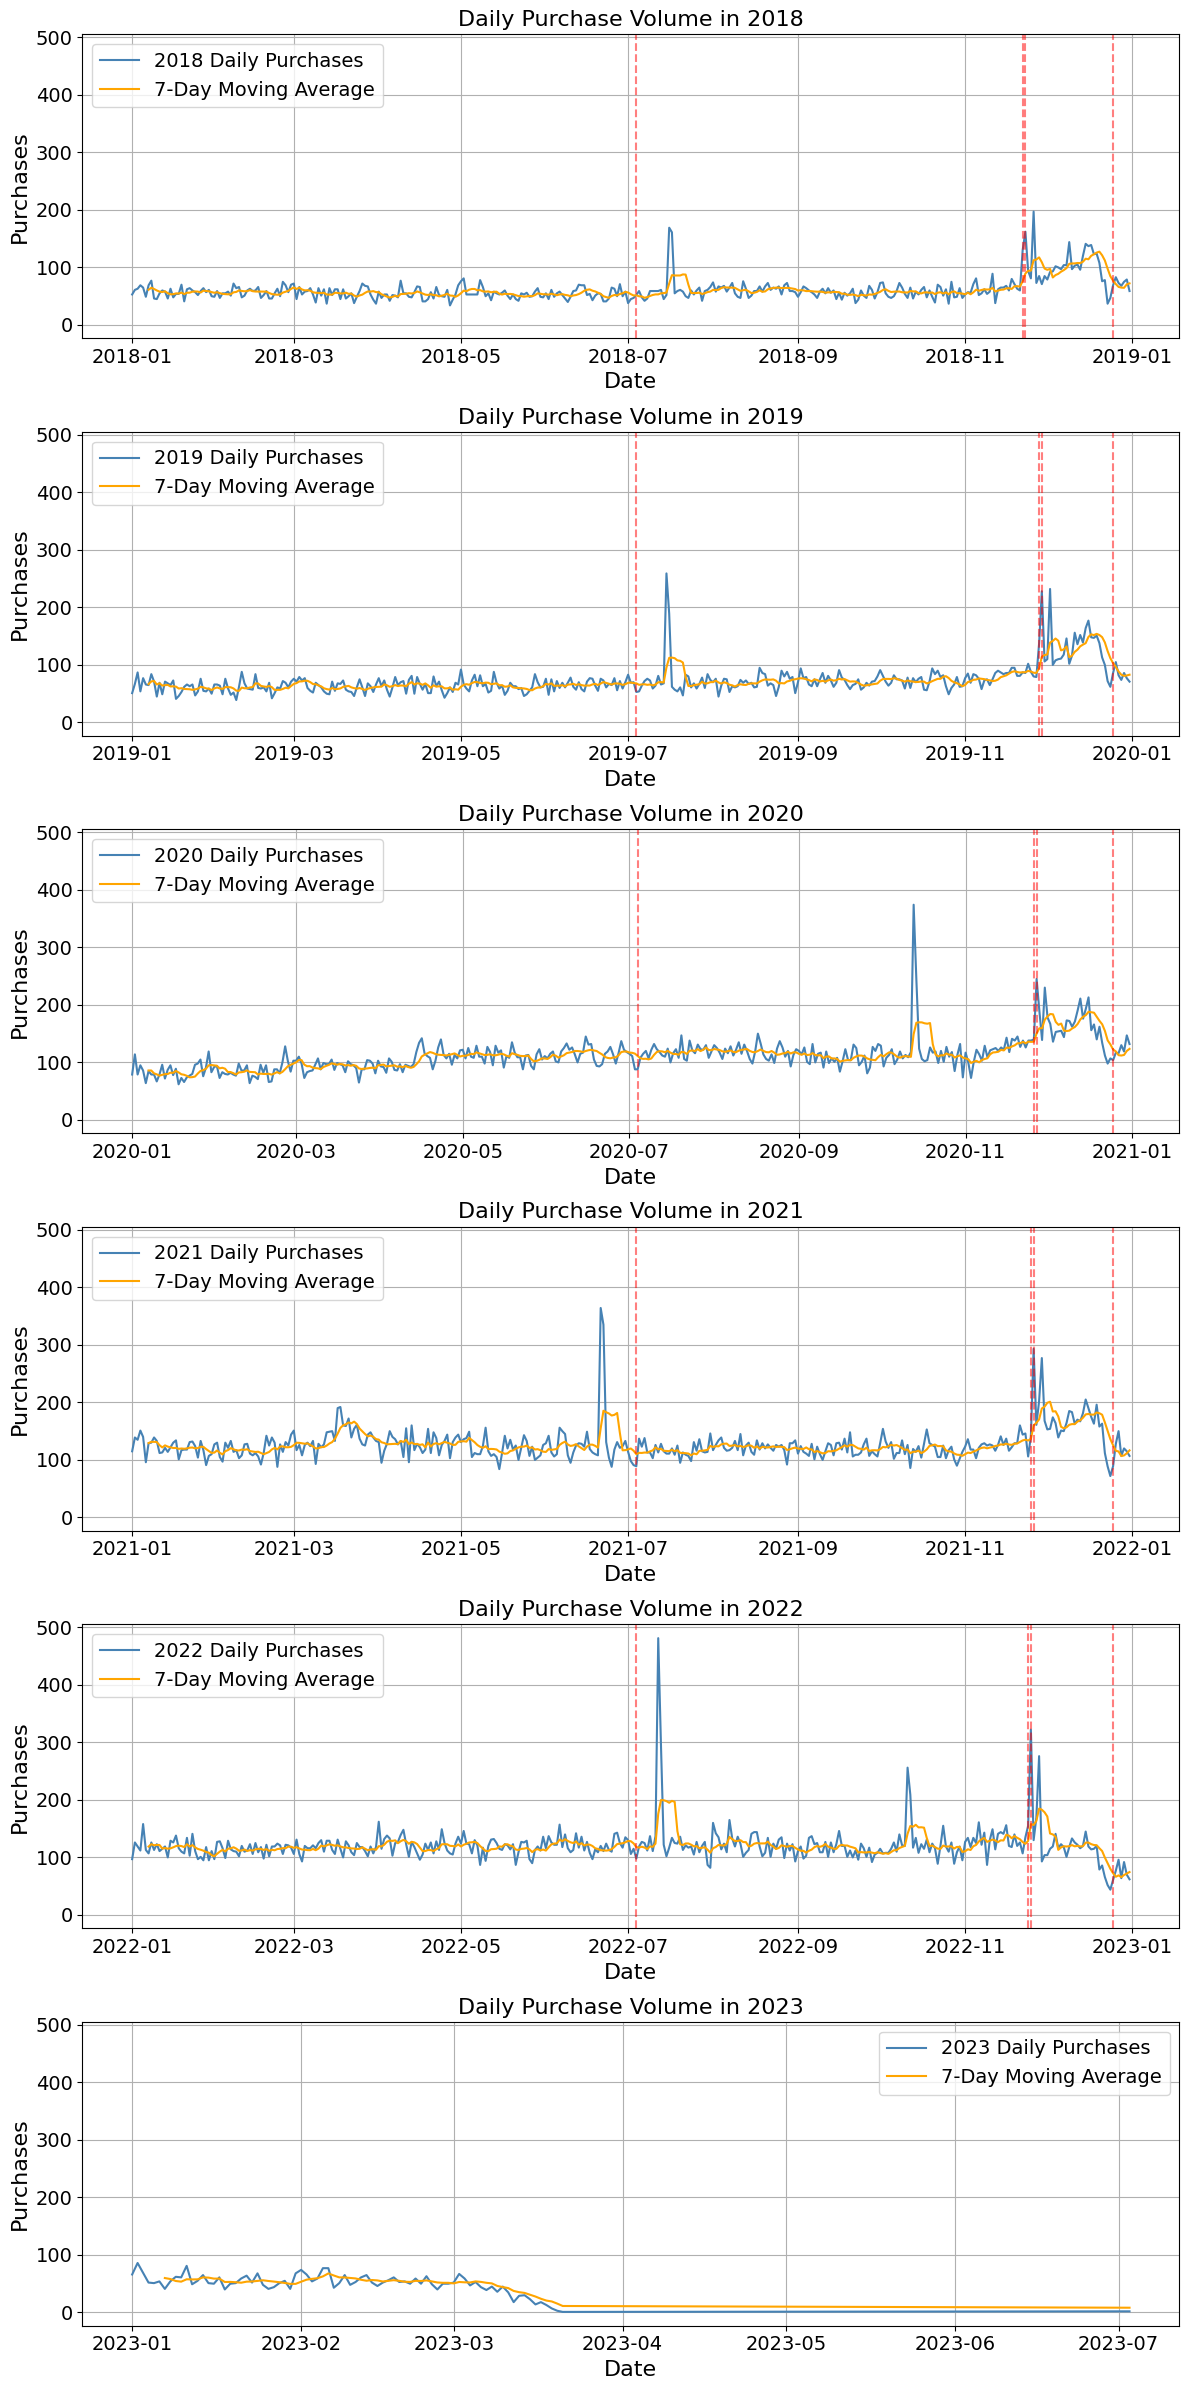

In [ ]:
black_fridays = [
    '2017-11-24', '2018-11-23', '2019-11-29', '2020-11-27', '2021-11-26', '2022-11-25'
]
independence_days = [
    '2017-07-04', '2018-07-04', '2019-07-04', '2020-07-04', '2021-07-04', '2022-07-04'
]
christmas_days = [
    '2017-12-25', '2018-12-25', '2019-12-25', '2020-12-25', '2021-12-25', '2022-12-25'
]
thanksgiving_days = [
    '2017-11-23', '2018-11-22', '2019-11-28', '2020-11-26', '2021-11-25', '2022-11-24'
]


all_holidays = pd.to_datetime(black_fridays + independence_days + christmas_days + thanksgiving_days)

fig, axes = plt.subplots(len(unique_years), 1, figsize=(12, 4 * len(unique_years)))

for i, year in enumerate(unique_years):
    ax = axes[i]
    yearly_data = df[df['Year'] == year].groupby('Order Date').size()
    rolling_year = yearly_data.rolling(window=7).mean()

    ax.plot(yearly_data.index, yearly_data.values, label=f'{year} Daily Purchases', color='steelblue')
    ax.plot(rolling_year.index, rolling_year.values, label='7-Day Moving Average', color='orange')

    # Filter and add holiday markers
    year_holidays = [h for h in all_holidays if h.year == year]
    for h in year_holidays:
        ax.axvline(h, color='red', linestyle='--', alpha=0.5)

    ax.set_title(f'Daily Purchase Volume in {year}', fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.set_ylabel('Purchases', fontsize=16)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()


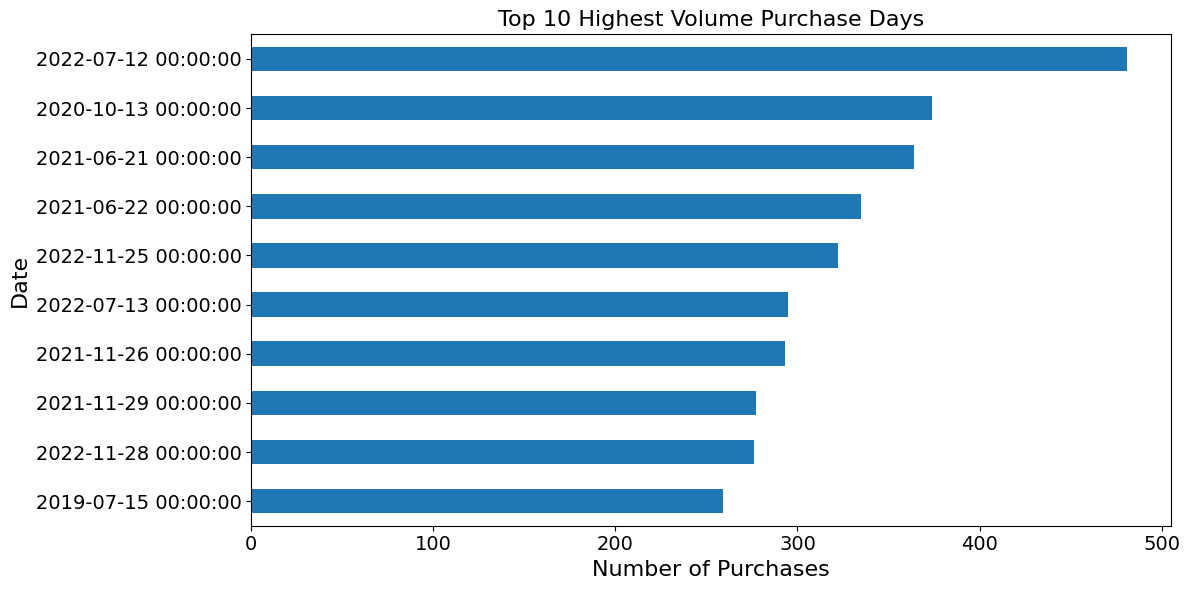

In [ ]:
daily_counts = df.groupby('Order Date').size()

top_10_days = daily_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_days.sort_values().plot(kind='barh')
plt.title('Top 10 Highest Volume Purchase Days', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=16)
plt.ylabel('Date', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


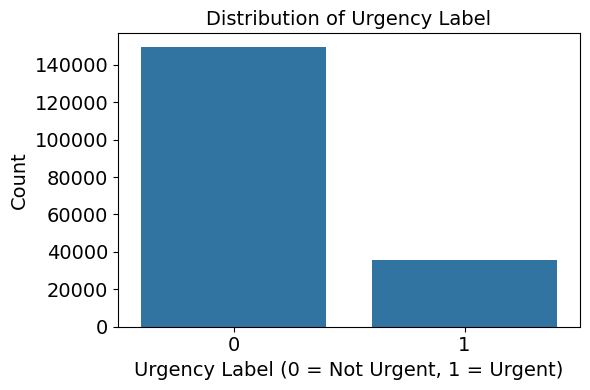

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='urgency_label', data=urgency_fe)
plt.title('Distribution of Urgency Label', fontsize=14)
plt.xlabel('Urgency Label (0 = Not Urgent, 1 = Urgent)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

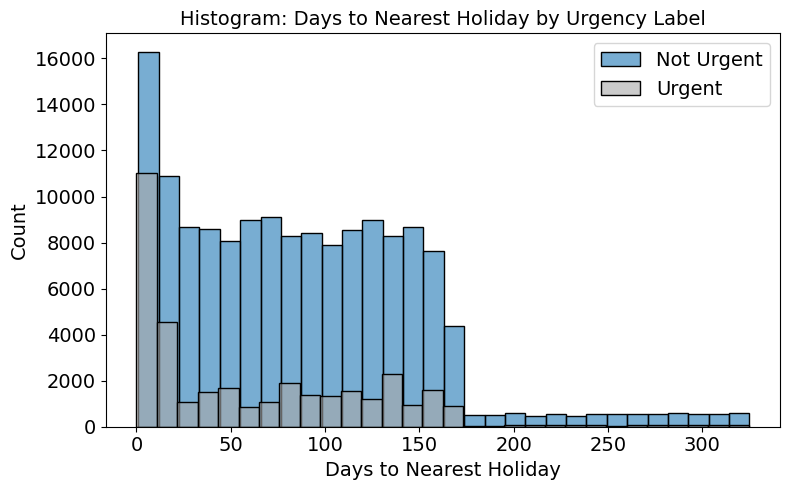

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.histplot(
    data=urgency_fe[urgency_fe['urgency_label'] == 0],
    x='days_to_nearest_holiday',
    label='Not Urgent',
    bins=30,
    alpha=0.6)

sns.histplot(
    data=urgency_fe[urgency_fe['urgency_label'] == 1],
    x='days_to_nearest_holiday',
    label='Urgent',
    color='darkgray',
    bins=30,
    alpha=0.6)

plt.title('Histogram: Days to Nearest Holiday by Urgency Label',fontsize=14)
plt.xlabel('Days to Nearest Holiday', fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


# **Social Proof**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
data

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 11 columns]

In [ ]:
data.dropna()

Unnamed: 0  Clothing ID  Age  \
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
5               5         1080   49   
6               6          858   39   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
5      I love tracy reese dresses, but this one is no...       2   
6      I aded this in my basket at hte last mintue to...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
5                    0                        4         General   
6                    1                        1  General Petite   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
5             Dresses    Dresses  
6                Tops      Knits  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[19662 rows x 11 columns]

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

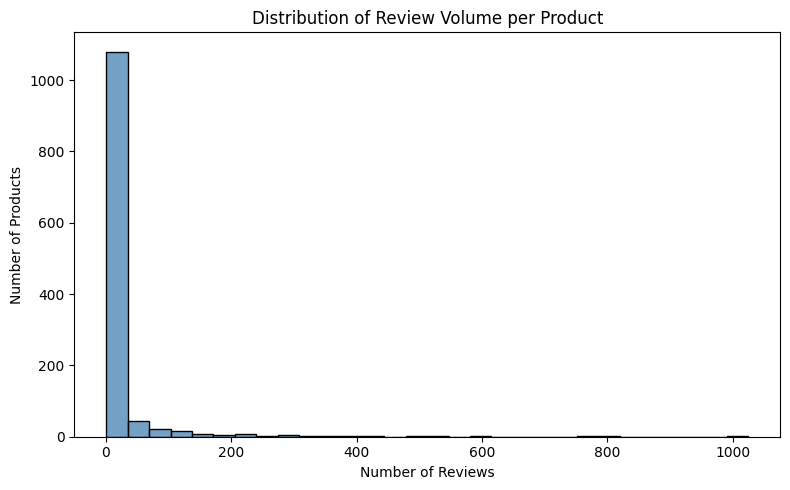

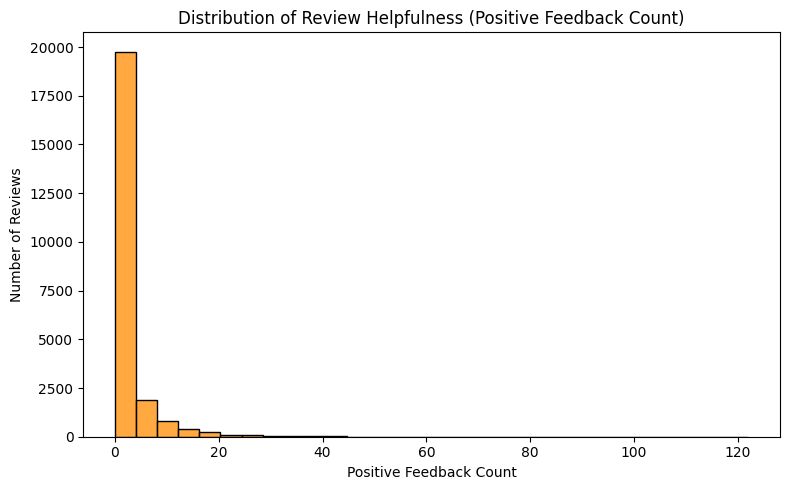

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

review_counts = data['Clothing ID'].value_counts()

plt.figure(figsize=(8, 5))
sns.histplot(review_counts, bins=30, color='steelblue')
plt.title('Distribution of Review Volume per Product')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.plot

# Plot 2: Distribution of Positive Feedback Count per Review
plt.figure(figsize=(8, 5))
sns.histplot(data['Positive Feedback Count'], bins=30, color='darkorange')
plt.title('Distribution of Review Helpfulness (Positive Feedback Count)')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.plot

In [ ]:
social_df = data.copy()

In [ ]:
# group by clothing ID to calculate item-level social proof indicators
agg = social_df.groupby('Clothing ID').agg({'Rating': ['mean', 'count'], 'Positive Feedback Count': ['mean', 'sum']})

In [ ]:
## rename the columns for clarity
agg.columns = ['Average Rating Per Item', 'Review Count Per Item', 'Average Helpfulness Per Item', 'Total Helpfulness Per Item']
agg.reset_index(inplace=True)

In [ ]:
social_df = social_df.merge(agg, on='Clothing ID', how='left')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
social_df[['norm_rating', 'norm_reviews', 'norm_helpfulness']] = scaler.fit_transform(social_df[['avg_rating_per_item', 'review_count_per_item', 'total_helpfulness_per_item']])
social_df['social_proof_score'] = (social_df['norm_rating']+social_df['norm_reviews']+social_df['norm_helpfulness'])

In [ ]:
## show result
ml_ready_df = social_df[['Clothing ID', 'Review Text', 'avg_rating_per_item', 'review_count_per_item','total_helpfulness_per_item', 'social_proof_score', 'Recommended IND']]

In [ ]:
ml_ready_df

Clothing ID                                        Review Text  \
0              767  Absolutely wonderful - silky and sexy and comf...   
1             1080  Love this dress!  it's sooo pretty.  i happene...   
2             1077  I had such high hopes for this dress and reall...   
3             1049  I love, love, love this jumpsuit. it's fun, fl...   
4              847  This shirt is very flattering to all due to th...   
...            ...                                                ...   
23481         1104  I was very happy to snag this dress at such a ...   
23482          862  It reminds me of maternity clothes. soft, stre...   
23483         1104  This fit well, but the top was very see throug...   
23484         1084  I bought this dress for a wedding i have this ...   
23485         1104  This dress in a lovely platinum is feminine an...   

       avg_rating_per_item  review_count_per_item  total_helpfulness_per_item  \
0                 4.500000                      2                           0   
1                 4.294118                    289                         849   
2                 4.084175                    297                         702   
3                 4.312500                     32                          90   
4                 4.000000                      4                           8   
...                    ...                    ...                         ...   
23481             4.043243                    185                         574   
23482             4.200993                    806                        1940   
23483             4.043243                    185                         574   
23484             3.458333                     72                         175   
23485             4.043243                    185                         574   

       social_proof_score  Recommended IND  
0                0.875978                1  
1                1.412329                1  
2                1.314460                0  
3                0.891001                1  
4                0.755828                1  
...                   ...              ...  
23481            1.148419                1  
23482            2.289285                1  
23483            1.148419                0  
23484            0.747324                1  
23485            1.148419                1  

[23486 rows x 7 columns]

In [ ]:
ml_ready_df.to_csv("social proof bias with feature engineering", index=False)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('social proof bias with feature engineering.csv')

In [ ]:
data.isnull().sum()

Clothing ID                     0
Review Text                   845
avg_rating_per_item             0
review_count_per_item           0
total_helpfulness_per_item      0
social_proof_score              0
Recommended IND                 0
dtype: int64

In [ ]:
data.dropna()

Clothing ID                                        Review Text  \
0              767  Absolutely wonderful - silky and sexy and comf...   
1             1080  Love this dress!  it's sooo pretty.  i happene...   
2             1077  I had such high hopes for this dress and reall...   
3             1049  I love, love, love this jumpsuit. it's fun, fl...   
4              847  This shirt is very flattering to all due to th...   
...            ...                                                ...   
23481         1104  I was very happy to snag this dress at such a ...   
23482          862  It reminds me of maternity clothes. soft, stre...   
23483         1104  This fit well, but the top was very see throug...   
23484         1084  I bought this dress for a wedding i have this ...   
23485         1104  This dress in a lovely platinum is feminine an...   

       avg_rating_per_item  review_count_per_item  total_helpfulness_per_item  \
0                 4.500000                      2                           0   
1                 4.294118                    289                         849   
2                 4.084175                    297                         702   
3                 4.312500                     32                          90   
4                 4.000000                      4                           8   
...                    ...                    ...                         ...   
23481             4.043243                    185                         574   
23482             4.200993                    806                        1940   
23483             4.043243                    185                         574   
23484             3.458333                     72                         175   
23485             4.043243                    185                         574   

       social_proof_score  Recommended IND  
0                0.875978                1  
1                1.412329                1  
2                1.314460                0  
3                0.891001                1  
4                0.755828                1  
...                   ...              ...  
23481            1.148419                1  
23482            2.289285                1  
23483            1.148419                0  
23484            0.747324                1  
23485            1.148419                1  

[22641 rows x 7 columns]

/tmp/ipython-input-3503215489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recommended IND', y='social_proof_score', data=data, palette='Set1')


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

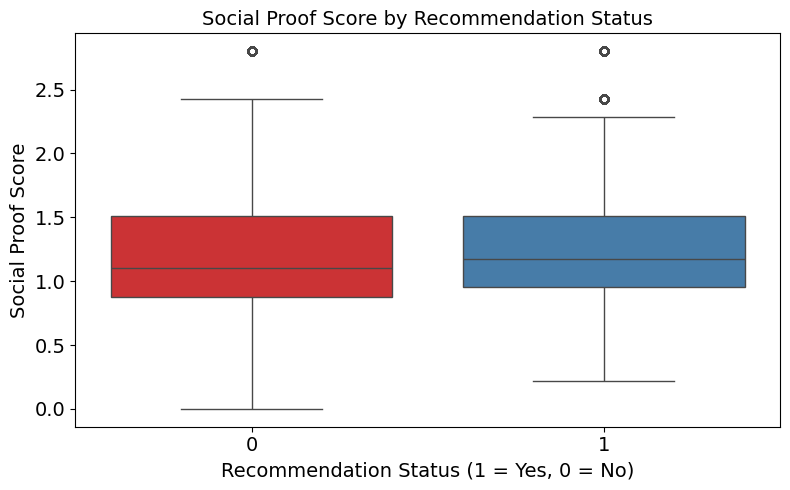

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x='Recommended IND', y='social_proof_score', data=data, palette='Set1')
plt.title('Social Proof Score by Recommendation Status', fontsize=14)
plt.xlabel('Recommendation Status (1 = Yes, 0 = No)', fontsize=14)
plt.ylabel('Social Proof Score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

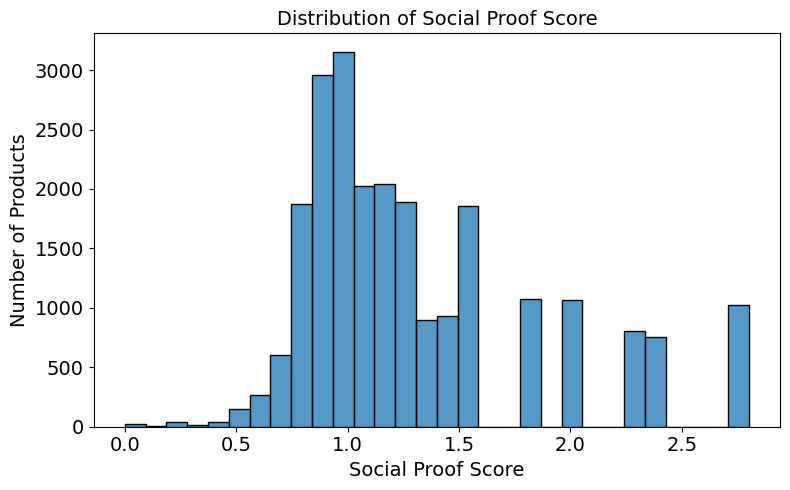

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['social_proof_score'], bins=30)
plt.title('Distribution of Social Proof Score', fontsize = 14)
plt.xlabel('Social Proof Score', fontsize = 14)
plt.ylabel('Number of Products', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.plot

In [ ]:
import pandas as pd

data = pd.read_csv("social proof bias without feature engineering")

FileNotFoundError: [Errno 2] No such file or directory: 'social proof bias without feature engineering'

# **Framing - Pricing Bias**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('synthetic_ecommerce_data.csv')

In [ ]:
df.head()

Transaction_ID     Customer_ID   Product_ID  \
0  8b460852-7c64-46fa-998b-b0976879d082     Customer_65  Product_224   
1  418612e7-8744-4ba3-bb0c-105b47e2a968   Customer_1910  Product_584   
2  5bc3b98f-cb0c-4b12-947c-df8bbb35a73e   Customer_2306  Product_374   
3  28fb67c8-e8c0-447a-841c-f760730de0eb  Customer_17206  Product_220   
4  8bee087a-a8a9-45bb-89d7-04d1710f1b00  Customer_16033  Product_358   

  Transaction_Date  Units_Sold  Discount_Applied  Revenue  Clicks  \
0       2024-10-06         134              0.14   305.54      11   
1       2024-10-29         109              0.30  1102.19      15   
2       2024-04-04         116              0.04   471.29      16   
3       2024-08-25         125              0.20   980.26      12   
4       2024-05-05         132              0.07   803.76      44   

   Impressions  Conversion_Rate         Category         Region  Ad_CTR  \
0           65             0.17      Electronics         Europe  0.0180   
1          201             0.07  Home Appliances           Asia  0.1589   
2          199             0.08             Toys           Asia  0.0596   
3          355             0.03         Clothing         Europe  0.0444   
4          355             0.12            Books  North America  0.1270   

   Ad_CPC  Ad_Spend  
0    0.55      9.90  
1    0.40     63.56  
2    1.50     89.40  
3    0.44     19.54  
4    0.53     67.31

In [ ]:
# Step 1: Calculate average unit price - gives the price per unit so we can compare discount effects across items of different sizes
df['avg_price'] = df['Revenue'] / df['Units_Sold']

# Step 2: Calculate discount amount per unit - captures absolute savings a consumer sees
df['discount_amount'] = df['avg_price'] * df['Discount_Applied']

# Step 3: Category-level average discount - captures perceived value influenced by category norms; is this a better deal than usual?
category_avg_discount = df.groupby('Category')['Discount_Applied'].transform('mean')
df['category_avg_discount'] = category_avg_discount

# Step 4: Relative discount compared to category - quantifies the framing bias - if an items discount is bigger than average, people may feel more compelled to buy
df['relative_discount'] = df['Discount_Applied'] - df['category_avg_discount']

# Step 5: Create high_revenue target: 1 if Revenue > median, else 0 - revenue is a proxy for high purchases
revenue_median = df['Revenue'].median()
df['high_revenue'] = (df['Revenue'] > revenue_median).astype(int)

In [ ]:
ml_ready_df = df[['Category', 'Units_Sold', 'Discount_Applied', 'Revenue', 'avg_price', 'discount_amount', 'category_avg_discount', 'relative_discount', 'high_revenue']]

In [ ]:
ml_ready_df

Category  Units_Sold  Discount_Applied  Revenue  avg_price  \
0          Electronics         134              0.14   305.54   2.280149   
1      Home Appliances         109              0.30  1102.19  10.111835   
2                 Toys         116              0.04   471.29   4.062845   
3             Clothing         125              0.20   980.26   7.842080   
4                Books         132              0.07   803.76   6.089091   
...                ...         ...               ...      ...        ...   
99995      Electronics         179              0.11   255.11   1.425196   
99996            Books         178              0.12  1302.60   7.317978   
99997      Electronics         212              0.26   491.36   2.317736   
99998      Electronics         180              0.09   598.91   3.327278   
99999             Toys         157              0.20   208.27   1.326561   

       discount_amount  category_avg_discount  relative_discount  high_revenue  
0             0.319221               0.150005          -0.010005             0  
1             3.033550               0.149167           0.150833             1  
2             0.162514               0.149679          -0.109679             1  
3             1.568416               0.149745           0.050255             1  
4             0.426236               0.150779          -0.080779             1  
...                ...                    ...                ...           ...  
99995         0.156772               0.150005          -0.040005             0  
99996         0.878157               0.150779          -0.030779             1  
99997         0.602611               0.150005           0.109995             1  
99998         0.299455               0.150005          -0.060005             1  
99999         0.265312               0.149679           0.050321             0  

[100000 rows x 9 columns]

In [ ]:
ml_ready_df.to_csv("framing bias dataset feature engineered.csv", index=False)

In [ ]:
import pandas as pd

data = pd.read_csv('framing bias dataset feature engineered.csv')

In [ ]:
data = data.drop(columns=['Revenue'])

In [ ]:
data.head()

Category  Units_Sold  Discount_Applied  avg_price  discount_amount  \
0      Electronics         134              0.14   2.280149         0.319221   
1  Home Appliances         109              0.30  10.111835         3.033550   
2             Toys         116              0.04   4.062845         0.162514   
3         Clothing         125              0.20   7.842080         1.568416   
4            Books         132              0.07   6.089091         0.426236   

   category_avg_discount  relative_discount  high_revenue  
0               0.150005          -0.010005             0  
1               0.149167           0.150833             1  
2               0.149679          -0.109679             1  
3               0.149745           0.050255             1  
4               0.150779          -0.080779             1

In [ ]:
data.high_revenue.value_counts()

high_revenue
0    50000
1    50000
Name: count, dtype: int64

In [ ]:
import pandas as pd
data = pd.read_csv('framing bias dataset feature engineered.csv')

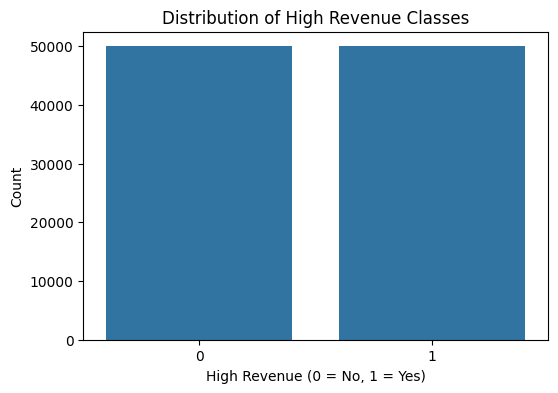

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of High Revenue classes
plt.figure(figsize=(6,4))
sns.countplot(x="high_revenue", data=data)

plt.title("Distribution of High Revenue Classes")
plt.xlabel("High Revenue (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.show()


/tmp/ipython-input-2440846571.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="high_revenue", y="Discount_Applied", data=data, palette="Set1")


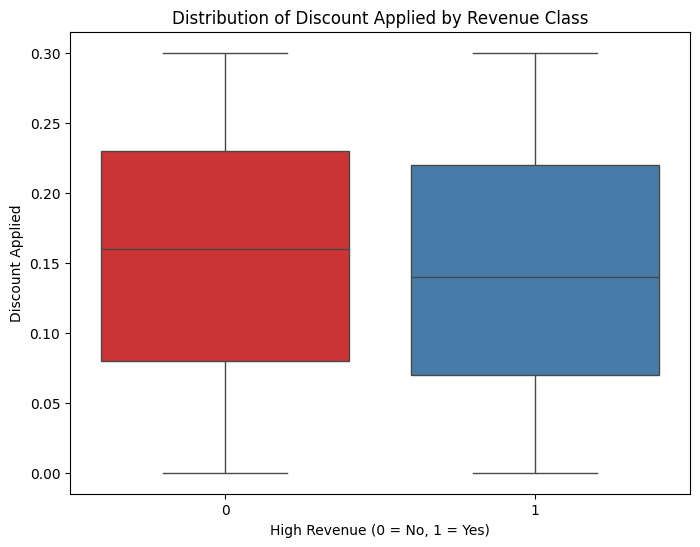

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Average Price by High Revenue
plt.figure(figsize=(8,6))
sns.boxplot(x="high_revenue", y="Discount_Applied", data=data, palette="Set1")
plt.title("Distribution of Discount Applied by Revenue Class")
plt.xlabel("High Revenue (0 = No, 1 = Yes)")
plt.ylabel("Discount Applied")
plt.show()


/tmp/ipython-input-2790594729.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="high_revenue", y="avg_price", data=data, palette="Set2", jitter=True)


<Axes: xlabel='high_revenue', ylabel='avg_price'>

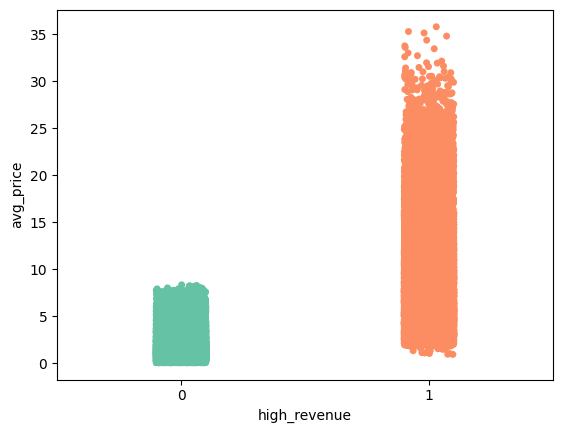

In [ ]:
sns.stripplot(x="high_revenue", y="avg_price", data=data, palette="Set2", jitter=True)


## **Urgency Bias - Models**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Urgency Feature Engineered')

In [ ]:
data.head()

Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0  2021-02-06                     9.99       1.0                     CT   
1  2020-01-12                    13.98       1.0                     NY   
2  2018-01-27                     7.98       1.0                     PA   
3  2018-10-09                    15.99       1.0                     MN   
4  2019-05-14                    22.99       1.0                     VA   

                                               Title ASIN/ISBN (Product Code)  \
0  ZEBRE Case Compatible with Apple Watch Screen ...               B08Q7Q2KRC   
1  Huggies Natural Care Sensitive Baby Wipes, Uns...               B07M6XVCBY   
2                                                NaN               B008ZZC6S6   
3  LEGO Technic WHACK! 42072 Building Kit with Pu...               B075QYRTXZ   
4                                                NaN               B07DXGBKRH   

             Category  Survey ResponseID  Holiday Purchase  \
0    SCREEN_PROTECTOR  R_AhNiHUaRBzQHY1b                 0   
1  SKIN_CLEANING_WIPE  R_2uyQHwENySBamVs                 0   
2                 NaN  R_3k5JabbpW5kTO7M                 0   
3  TOY_BUILDING_BLOCK  R_2pKbiSIpze2jP6t                 0   
4                 NaN  R_1KkFs7rgWXlWf58                 0   

   Days to Nearest Holiday  Purchase Amount  High Value Purchase  \
0                       43             9.99                    0   
1                       18            13.98                    0   
2                      299             7.98                    0   
3                       44            15.99                    0   
4                      140            22.99                    0   

   Daily Volume  High Volume Day  Urgency Label  
0           133                0              0  
1            96                0              0  
2            64                0              0  
3            65                0              0  
4            69                0              0

In [ ]:
data.shape

(185072, 15)

In [ ]:
df = data.iloc[:, 8:]

In [ ]:
df

Holiday Purchase  Days to Nearest Holiday  Purchase Amount  \
0                      0                       43             9.99   
1                      0                       18            13.98   
2                      0                      299             7.98   
3                      0                       44            15.99   
4                      0                      140            22.99   
...                  ...                      ...              ...   
185067                 0                      141             9.98   
185068                 0                       40            18.99   
185069                 0                        4            12.95   
185070                 0                       71             9.97   
185071                 0                       53             2.59   

        High Value Purchase  Daily Volume  High Volume Day  Urgency Label  
0                         0           133                0              0  
1                         0            96                0              0  
2                         0            64                0              0  
3                         0            65                0              0  
4                         0            69                0              0  
...                     ...           ...              ...            ...  
185067                    0           127                0              0  
185068                    0           116                0              0  
185069                    0           160                1              1  
185070                    0           130                0              0  
185071                    0           107                0              0  

[185072 rows x 7 columns]

In [ ]:
df = df.dropna()

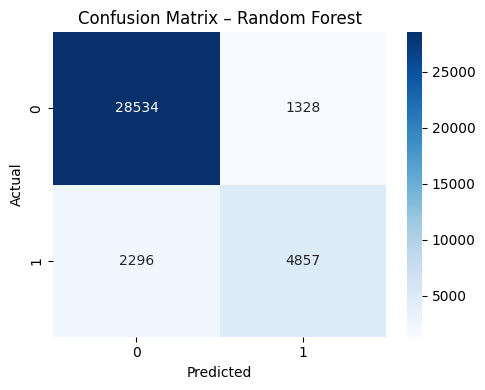


Random Forest Evaluation
Training Time: 12.0869 seconds
Train Accuracy: 0.9510
Test Accuracy: 0.9021
Overfitting Gap: 0.0489

Classification Report:


precision    recall  f1-score       support
0              0.925527  0.955529  0.940289  29862.000000
1              0.785287  0.679016  0.728295   7153.000000
accuracy       0.902094  0.902094  0.902094      0.902094
macro avg      0.855407  0.817272  0.834292  37015.000000
weighted avg   0.898426  0.902094  0.899322  37015.000000

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

data = pd.read_csv('Urgency Feature Engineered')
df = data.iloc[:, 8:]
df = df.dropna()

X = df.drop(columns=['Daily Volume', 'High Volume Day', 'Urgency Label'])
y = df['Urgency Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True)).transpose()

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.tight_layout()
plt.show()

print("\nRandom Forest Evaluation")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
print("\nClassification Report:")
display(report_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

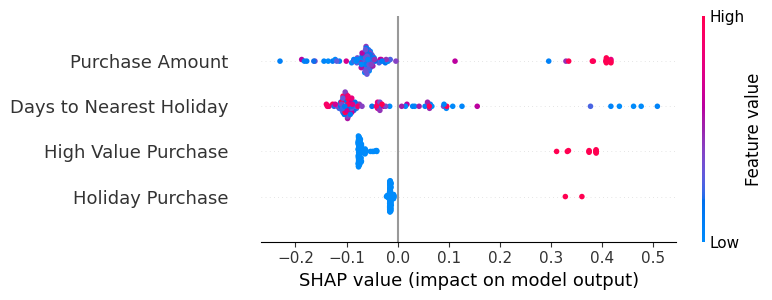

In [ ]:
import shap

X_sample = X_test.sample(100, random_state=42)
background = X_train.sample(50, random_state=42)

def model_predict_class1(X):
    return model.predict_proba(X)[:, 1]

explainer = shap.KernelExplainer(model_predict_class1, background)
shap_values = explainer.shap_values(X_sample, nsamples=100)

shap.summary_plot(shap_values, X_sample, show=False)
plt.tight_layout()
plt.show()


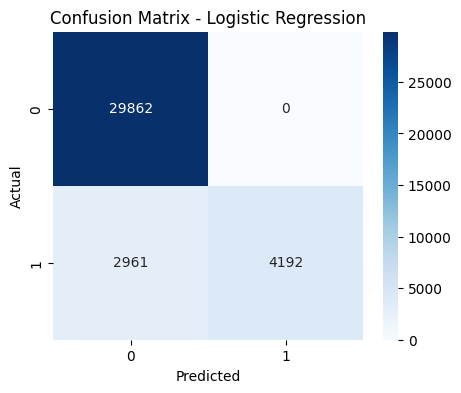

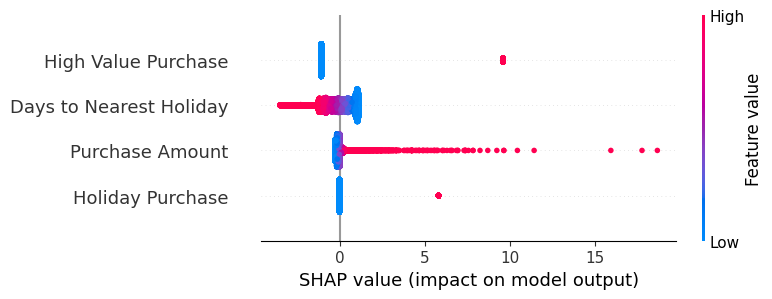


 Logistic Regression Evaluation
Training Time: 1.4016 seconds
Train Accuracy: 0.9169
Test Accuracy: 0.9200
Overfitting Gap: 0.0031

Classification Report:


precision    recall  f1-score       support
0              0.909789  1.000000  0.952764  29862.000000
1              1.000000  0.586048  0.739004   7153.000000
accuracy       0.920005  0.920005  0.920005      0.920005
macro avg      0.954894  0.793024  0.845884  37015.000000
weighted avg   0.927222  0.920005  0.911456  37015.000000

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap


X = df.drop(columns=['Daily Volume', 'High Volume Day', 'Urgency Label'])
y = df['Urgency Label']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## model timing
start_time = time.time()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
train_time = time.time() - start_time

## predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True)).transpose()

# overfitting gap
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

## confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

## SHAP values
explainer = shap.LinearExplainer(model, X_train, feature_pertubation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


print("\n Logistic Regression Evaluation")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
print("\nClassification Report:")
display(report_df)

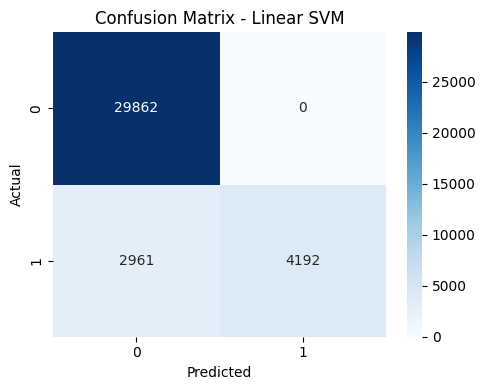

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


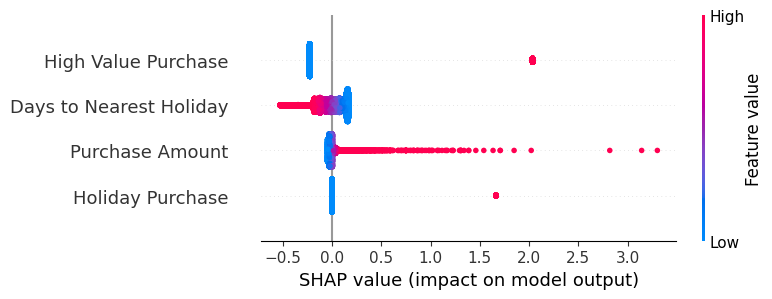


Linear SVM Evaluation
Training Time: 0.2563 seconds
Train Accuracy:  0.9169
Test Accuracy:   0.9200
Overfitting Gap: 0.0031


0            1  accuracy     macro avg  weighted avg
precision      0.909789     1.000000  0.920005      0.954894      0.927222
recall         1.000000     0.586048  0.920005      0.793024      0.920005
f1-score       0.952764     0.739004  0.920005      0.845884      0.911456
support    29862.000000  7153.000000  0.920005  37015.000000  37015.000000

In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Daily Volume', 'High Volume Day', 'Urgency Label'])
y = df['Urgency Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

start_time = time.time()
svm_model = LinearSVC(max_iter=5000, random_state=42)  # C=1.0, L2, squared_hinge by default
svm_model.fit(X_train_s, y_train)
train_time = time.time() - start_time

y_train_pred = svm_model.predict(X_train_s)
y_test_pred  = svm_model.predict(X_test_s)

report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

train_acc = svm_model.score(X_train_s, y_train)
test_acc  = svm_model.score(X_test_s, y_test)
overfit_gap = abs(train_acc - test_acc)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.tight_layout()
plt.show()

explainer = shap.LinearExplainer(svm_model, X_train_s, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_s)
shap.summary_plot(shap_values, X_test_s, feature_names=X.columns)

print("\nLinear SVM Evaluation")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy:  {train_acc:.4f}")
print(f"Test Accuracy:   {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:07:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


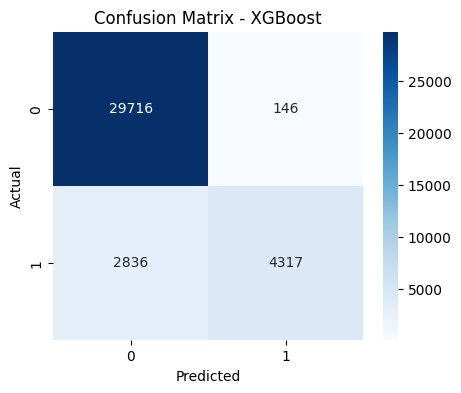

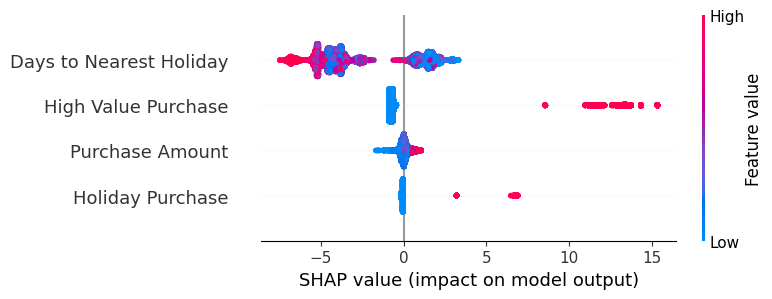


 XGBoost Evaluation
Training Time: 0.8869 seconds
Train Accuracy: 0.9193
Test Accuracy: 0.9194
Overfitting Gap: 0.0001

Classification Report:


precision    recall  f1-score       support
0              0.912878  0.995111  0.952222  29862.000000
1              0.967287  0.603523  0.743285   7153.000000
accuracy       0.919438  0.919438  0.919438      0.919438
macro avg      0.940082  0.799317  0.847754  37015.000000
weighted avg   0.923392  0.919438  0.911846  37015.000000

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier # Corrected import
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap


X = df.drop(columns=['Daily Volume', 'High Volume Day', 'Urgency Label'])
y = df['Urgency Label']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## model timing
start_time = time.time()
xgb_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42)

xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Predictions
y_pred = xgb_model.predict(X_test)

# classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_pred, output_dict=True)).transpose()

# overfitting gap
train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

## confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

## SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


print("\n XGBoost Evaluation")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
print("\nClassification Report:")
display(report_df)

In [ ]:
pip install shap --upgrade


In [ ]:
pip install numpy==1.26.4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4049/4049 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9169 - loss: 0.2250
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9171 - loss: 0.2238
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


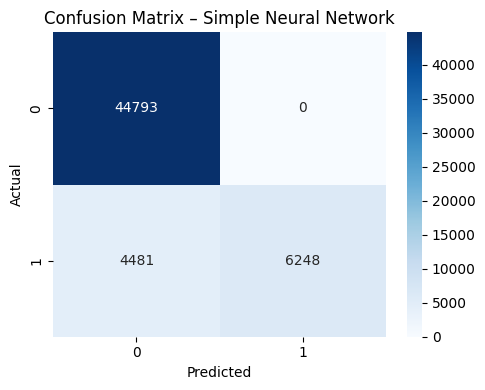


=== Simple Neural Network Evaluation ===
Training Time: 407.0288s
Train Accuracy: 0.9167  |  Test Accuracy: 0.9193  |  Overfitting Gap: 0.0026


0             1  accuracy     macro avg  weighted avg
precision      0.909060      1.000000  0.919293      0.954530      0.926633
recall         1.000000      0.582347  0.919293      0.791173      0.919293
f1-score       0.952364      0.736055  0.919293      0.844209      0.910564
support    44793.000000  10729.000000  0.919293  55522.000000  55522.000000

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shap

# Load data
data = pd.read_csv('Urgency Feature Engineered')
df = data.iloc[:, 8:]
X = df.drop(columns=['Daily Volume', 'High Volume Day', 'Urgency Label'])
y = df['Urgency Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Train
start_time = time.time()
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=20,
    batch_size=32,
    verbose=0)
train_time = time.time() - start_time

# Evaluate
train_acc = model.evaluate(X_train_s, y_train, verbose=1)[1]
test_acc  = model.evaluate(X_test_s, y_test, verbose=1)[1]
overfit_gap = abs(train_acc - test_acc)

# Predictions
y_pred_probs = model.predict(X_test_s)
y_pred = (y_pred_probs > 0.5).astype(int)

# Report
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Simple Neural Network")
plt.tight_layout()
plt.show()

# Output
print("\n Simple Neural Network Evaluation ")
print(f"Training Time: {train_time:.4f}s")
print(f"Train Accuracy: {train_acc:.4f}  |  Test Accuracy: {test_acc:.4f}  |  Overfitting Gap: {overfit_gap:.4f}")
display(report_df)



Generating SHAP values for Neural Network...


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_12
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_12
Received: inputs=['Tensor(shape=(200, 4))']
  warnings.warn(msg)


SHAP shape: (100, 4), Input shape: (100, 4)


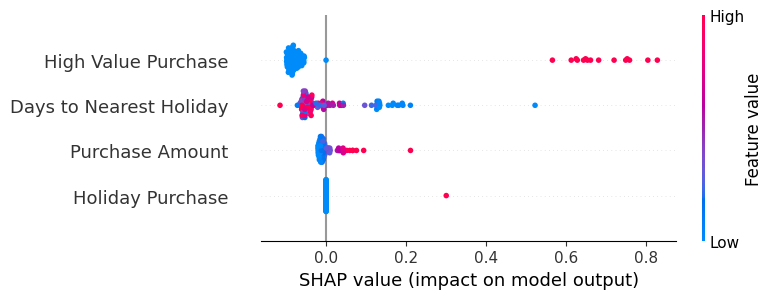

In [ ]:
import shap
import numpy as np
import pandas as pd

background = X_train_s[np.random.choice(X_train_s.shape[0], 100, replace=False)]
X_sample = X_test_s[np.random.choice(X_test_s.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    shap_array = shap_values[0]
else:
    shap_array = shap_values

shap_array = np.squeeze(shap_array, axis=-1)

print(f"SHAP shape: {shap_array.shape}, Input shape: {X_sample.shape}")
assert shap_array.shape == X_sample.shape, "Mismatch between SHAP and input shapes!"

X_sample_df = pd.DataFrame(X_sample, columns=X.columns)

shap.summary_plot(shap_array, X_sample_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4049/4049 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9169 - loss: 0.2324
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9171 - loss: 0.2299
1736/1736 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


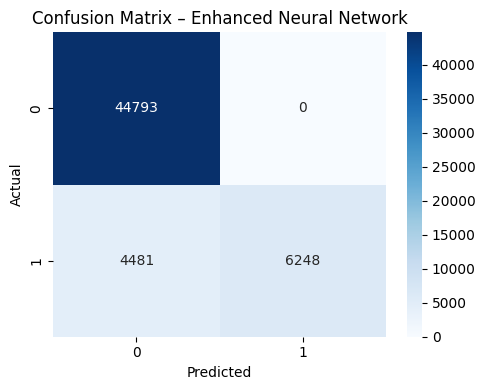


=== Enhanced Neural Network Evaluation ===
Training Time: 643.7293s
Train Accuracy: 0.9167  |  Test Accuracy: 0.9193  |  Overfitting Gap: 0.0026


0             1  accuracy     macro avg  weighted avg
precision      0.909060      1.000000  0.919293      0.954530      0.926633
recall         1.000000      0.582347  0.919293      0.791173      0.919293
f1-score       0.952364      0.736055  0.919293      0.844209      0.910564
support    44793.000000  10729.000000  0.919293  55522.000000  55522.000000

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import shap

X = df.drop(columns=['Daily Volume', 'High Volume Day', 'Urgency Label'])
y = df['Urgency Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_s.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

start_time = time.time()
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=30,
    batch_size=32,
    verbose=0)

train_time = time.time() - start_time

train_results = model.evaluate(X_train_s, y_train, verbose=1)
test_results  = model.evaluate(X_test_s, y_test, verbose=1)
train_acc = train_results[1]
test_acc = test_results[1]
overfit_gap = abs(train_acc - test_acc)

y_pred_probs = model.predict(X_test_s)
y_pred = (y_pred_probs > 0.5).astype(int)

report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Enhanced Neural Network")
plt.tight_layout()
plt.show()

print("\n=== Enhanced Neural Network Evaluation ===")
print(f"Training Time: {train_time:.4f}s")
print(f"Train Accuracy: {train_acc:.4f}  |  Test Accuracy: {test_acc:.4f}  |  Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


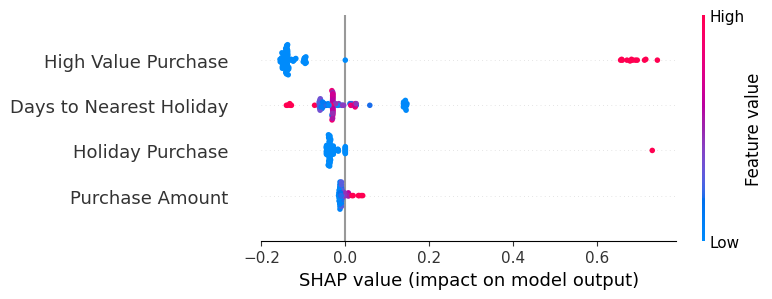

In [ ]:
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)
X_test_s_df  = pd.DataFrame(X_test_s,  columns=X.columns)

bg_n = min(100, len(X_train_s_df))
sm_n = min(100, len(X_test_s_df))
background = X_train_s_df.sample(bg_n, random_state=42).reset_index(drop=True)
X_sample   = X_test_s_df.sample(sm_n,  random_state=42).reset_index(drop=True)

explainer = shap.DeepExplainer(model, background.values)
shap_values = explainer.shap_values(X_sample.values)

shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
if shap_array.ndim == 3 and shap_array.shape[-1] == 1:
    shap_array = np.squeeze(shap_array, axis=-1)

shap.summary_plot(shap_array, X_sample, show=True)


In [ ]:
!pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00


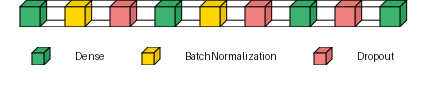

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models, Input
import visualkeras
from PIL import ImageFont

model = models.Sequential([
    Input(shape=(1000,)),
    layers.Dense(128, activation='relu', name='Dense_128'),
    layers.BatchNormalization(name='BatchNorm_1'),
    layers.Dropout(0.3, name='Dropout_0_3_a'),

    layers.Dense(64, activation='relu', name='Dense_64'),
    layers.BatchNormalization(name='BatchNorm_2'),
    layers.Dropout(0.3, name='Dropout_0_3_b'),

    layers.Dense(32, activation='relu', name='Dense_32'),
    layers.Dropout(0.2, name='Dropout_0_2'),

    layers.Dense(1, activation='sigmoid', name='Output')])
model.build()

color_map = {
    layers.Dense:              {"fill": "mediumseagreen",   "outline": "black"},
    layers.Dropout:            {"fill": "lightcoral",       "outline": "black"},
    layers.BatchNormalization: {"fill": "gold",             "outline": "black"},
    layers.InputLayer:         {"fill": "cornflowerblue",   "outline": "black"},}

try:
    font = ImageFont.truetype("arial.ttf", 12)
except:
    font = None

visualkeras.layered_view(
    model,
    to_file="mlp_visual_3d.png",
    legend=True,
    color_map=color_map,
    draw_volume=True,
    spacing=25,
    padding=20,
    scale_xy=1.3,
    font=font,
    font_color="black",
    legend_text_spacing_offset=10)


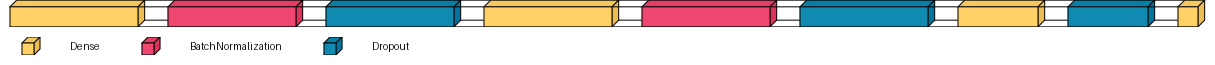

In [ ]:
import visualkeras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(1000,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')])


max_units = max([l.units for l in model.layers if isinstance(l, Dense)])

visualkeras.layered_view(
    model,
    to_file="deep_nn_visual_scaled_xy.png",
    legend=True,
    draw_volume=True,
    max_z=max([l.units for l in model.layers if isinstance(l, Dense)]),
    scale_z=2.5,
    scale_xy=1.6,
    spacing=30,
    font_color="black")



## **Social Proof - Models**

In [ ]:
import pandas as pd
df = pd.read_csv("social proof bias with feature engineering")

In [ ]:
df.rename(columns={"avg_rating_per_item": "Average Rating Per Item", "review_count_per_item":"Review Count Per Item", "total_helpfulness_per_item":"Total Helpfulness Per Item", "social_proof_score":"Social Proof Score"}, inplace=True)

Logistic Regression

In [ ]:
df.head()

Clothing ID                                        Review Text  \
0          767  Absolutely wonderful - silky and sexy and comf...   
1         1080  Love this dress!  it's sooo pretty.  i happene...   
2         1077  I had such high hopes for this dress and reall...   
3         1049  I love, love, love this jumpsuit. it's fun, fl...   
4          847  This shirt is very flattering to all due to th...   

   Average Rating Per Item  Review Count Per Item  Total Helpfulness Per Item  \
0                 4.500000                      2                           0   
1                 4.294118                    289                         849   
2                 4.084175                    297                         702   
3                 4.312500                     32                          90   
4                 4.000000                      4                           8   

   Social Proof Score  Recommended IND  
0            0.875978                1  
1            1.412329                1  
2            1.314460                0  
3            0.891001                1  
4            0.755828                1

In [ ]:
df = df.drop(columns=['Review Text','Clothing ID'])

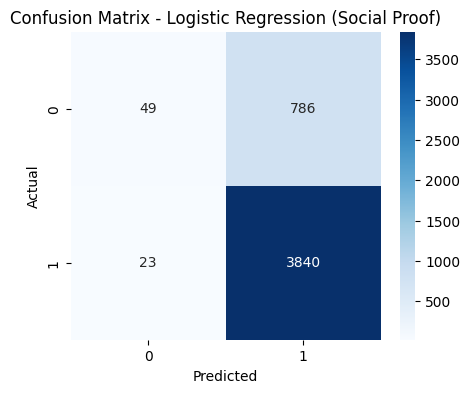

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


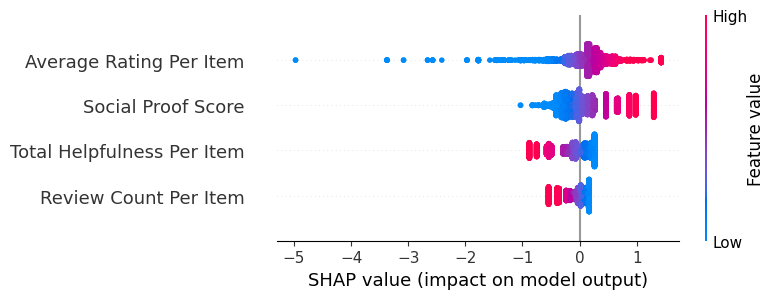


Logistic Regression Evaluation - Social Proof Dataset
Training Time: 0.3003 seconds
Train Accuracy: 0.8264
Test Accuracy: 0.8278
Overfitting Gap: 0.0014


0            1  accuracy    macro avg  weighted avg
precision    0.680556     0.830091  0.827799     0.755323      0.803513
recall       0.058683     0.994046  0.827799     0.526364      0.827799
f1-score     0.108049     0.904700  0.827799     0.506374      0.763107
support    835.000000  3863.000000  0.827799  4698.000000   4698.000000

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import shap
from sklearn.preprocessing import StandardScaler


StandardScaler = StandardScaler()
df['Average Rating Per Item'] = StandardScaler.fit_transform(df)
X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))
# overfitting gap
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

# confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Social Proof)")
plt.show()

# SHAP
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

print("\nLogistic Regression Evaluation - Social Proof Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)

SVM

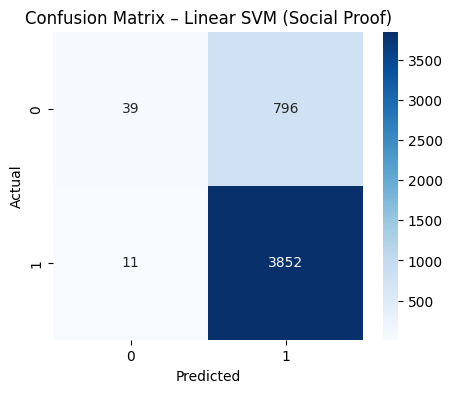

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


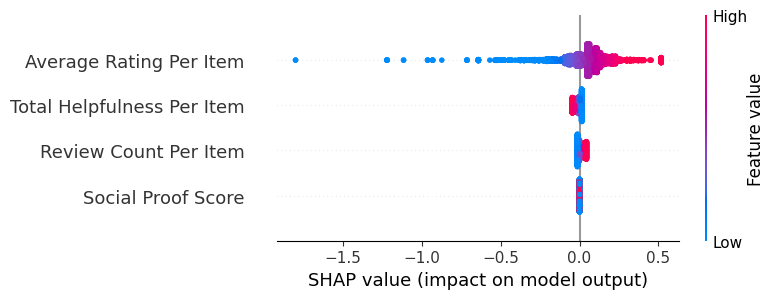


=== Linear SVM Evaluation – Social Proof Dataset ===
Training Time: 0.1792 seconds
Train Accuracy: 0.8268
Test Accuracy: 0.8282
Overfitting Gap: 0.0015


0            1  accuracy    macro avg  weighted avg
precision    0.780000     0.828744  0.828225     0.804372      0.820080
recall       0.046707     0.997152  0.828225     0.521930      0.828225
f1-score     0.088136     0.905182  0.828225     0.496659      0.759964
support    835.000000  3863.000000  0.828225  4698.000000   4698.000000

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import shap

median_score = df['Social Proof Score'].median()
df['Social Proof Score'] = (df['Social Proof Score'] > median_score).astype(int)

X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = LinearSVC(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Linear SVM (Social Proof)")
plt.show()

explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

print("\n Linear SVM Evaluation – Social Proof Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


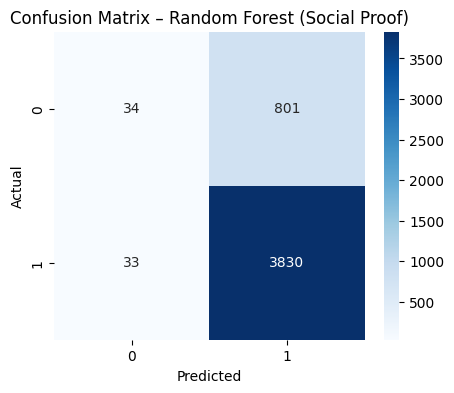

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

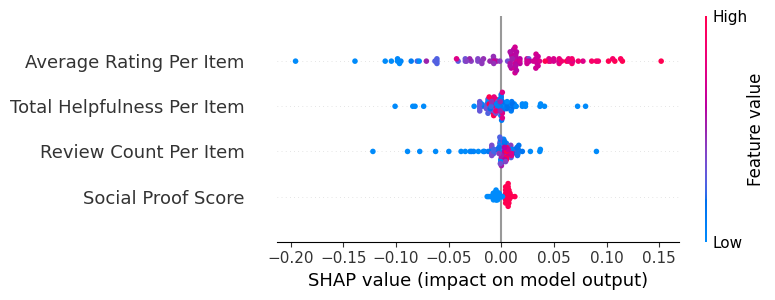


=== Random Forest Evaluation – Social Proof Dataset ===
Training Time: 3.0175 seconds
Train Accuracy: 0.8284
Test Accuracy: 0.8225
Overfitting Gap: 0.0059


0            1  accuracy    macro avg  weighted avg
precision    0.507463     0.827035  0.822478     0.667249      0.770236
recall       0.040719     0.991457  0.822478     0.516088      0.822478
f1-score     0.075388     0.901813  0.822478     0.488601      0.754928
support    835.000000  3863.000000  0.822478  4698.000000   4698.000000

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap

median_score = df['Social Proof Score'].median()
df['Social Proof Score'] = (df['Social Proof Score'] > median_score).astype(int)

X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1)

model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest (Social Proof)")
plt.show()

import shap

X_sample = X_test.sample(100, random_state=42)
background = X_train.sample(50, random_state=42)

def model_predict_class1(X):
    return model.predict_proba(X)[:, 1]

explainer = shap.KernelExplainer(model_predict_class1, background)
shap_values = explainer.shap_values(X_sample, nsamples=100)

shap.summary_plot(shap_values, X_sample, show=False)
plt.tight_layout()
plt.show()

print("\nRandom Forest Evaluation – Social Proof Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:55:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


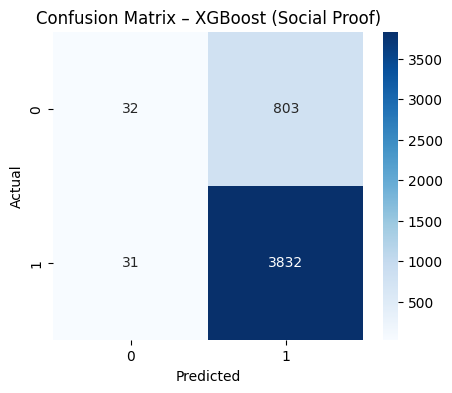

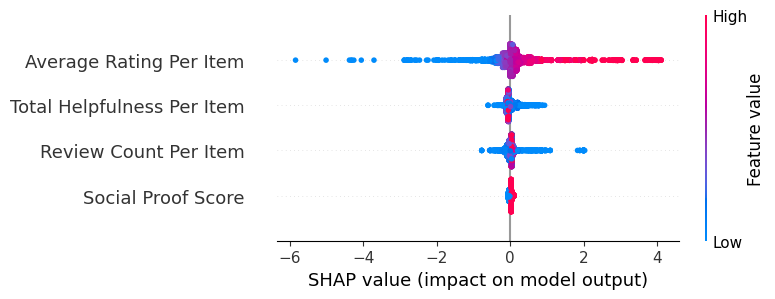


=== XGBoost Evaluation – Social Proof Dataset ===
Training Time: 0.4570 seconds
Train Accuracy: 0.8281
Test Accuracy: 0.8225
Overfitting Gap: 0.0056


0            1  accuracy    macro avg  weighted avg
precision    0.507937     0.826753  0.822478     0.667345      0.770088
recall       0.038323     0.991975  0.822478     0.515149      0.822478
f1-score     0.071269     0.901859  0.822478     0.486564      0.754234
support    835.000000  3863.000000  0.822478  4698.000000   4698.000000

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import shap
from xgboost import XGBClassifier

median_score = df['Social Proof Score'].median()
df['Social Proof Score'] = (df['Social Proof Score'] > median_score).astype(int)

X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1)

model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost (Social Proof)")
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

print("\nXGBoost Evaluation – Social Proof Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


588/588 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7981 - loss: 0.4990 - val_accuracy: 0.8278 - val_loss: 0.4499
Epoch 2/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8269 - loss: 0.4414 - val_accuracy: 0.8278 - val_loss: 0.4478
Epoch 3/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8278 - loss: 0.4415 - val_accuracy: 0.8284 - val_loss: 0.4464
Epoch 4/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8266 - loss: 0.4429 - val_accuracy: 0.8284 - val_loss: 0.4466
Epoch 5/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8301 - loss: 0.4405 - val_accuracy: 0.8287 - val_loss: 0.4465
Epoch 6/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8257 - loss: 0.4432 - val_accuracy: 0.8284 - val_loss: 0.4462
Epoch 7/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8305 - loss: 0.4365 - val_accuracy: 0.8276 - val_loss: 0.4467
Epoch 8/20
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8316 - loss: 0.4352 - val_accuracy: 0.8287 - val

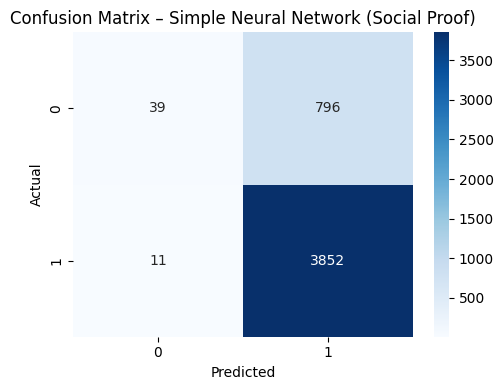


=== Simple Neural Network Evaluation – Social Proof Dataset ===
Training Time: 81.3780 seconds
Train Accuracy: 0.8268
Test Accuracy: 0.8282
Overfitting Gap: 0.0015


0            1  accuracy    macro avg  weighted avg
precision    0.780000     0.828744  0.828225     0.804372      0.820080
recall       0.046707     0.997152  0.828225     0.521930      0.828225
f1-score     0.088136     0.905182  0.828225     0.496659      0.759964
support    835.000000  3863.000000  0.828225  4698.000000   4698.000000

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

start_time = time.time()
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=20,
    batch_size=32,
    verbose=1)
train_time = time.time() - start_time

train_acc = model.evaluate(X_train_s, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test_s, y_test, verbose=0)[1]
overfit_gap = abs(train_acc - test_acc)

y_pred_probs = model.predict(X_test_s)
y_pred = (y_pred_probs > 0.5).astype(int)

report_df = pd.DataFrame(
    classification_report(y_test, y_pred, output_dict=True))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Simple Neural Network (Social Proof)")
plt.tight_layout()
plt.show()

print("\nSimple Neural Network Evaluation – Social Proof Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_26
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_26
Received: inputs=['Tensor(shape=(200, 4))']
  warnings.warn(msg)


SHAP shape: (100, 4), Input shape: (100, 4)


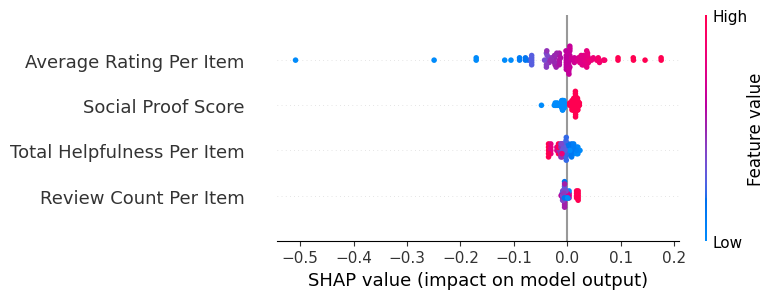

In [ ]:
import shap
import numpy as np
import pandas as pd

background = X_train_s[np.random.choice(X_train_s.shape[0], 100, replace=False)]
X_sample = X_test_s[np.random.choice(X_test_s.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    shap_array = shap_values[0]
else:
    shap_array = shap_values

shap_array = np.squeeze(shap_array, axis=-1)

print(f"SHAP shape: {shap_array.shape}, Input shape: {X_sample.shape}")
assert shap_array.shape == X_sample.shape, "Mismatch between SHAP and input shapes!"

X_sample_df = pd.DataFrame(X_sample, columns=X.columns)

shap.summary_plot(shap_array, X_sample_df)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7235 - loss: 0.6110 - val_accuracy: 0.8244 - val_loss: 0.4572
Epoch 2/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8174 - loss: 0.4838 - val_accuracy: 0.8259 - val_loss: 0.4476
Epoch 3/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8287 - loss: 0.4522 - val_accuracy: 0.8287 - val_loss: 0.4456
Epoch 4/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8238 - loss: 0.4613 - val_accuracy: 0.8259 - val_loss: 0.4474
Epoch 5/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8219 - loss: 0.4585 - val_accuracy: 0.8257 - val_loss: 0.4459
Epoch 6/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8218 - loss: 0.4575 - val_accuracy: 0.8282 - val_loss: 0.4458
Epoch 7/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8269 - loss: 0.4531 - val_accuracy: 0.8282 - val_loss: 0.4450
Epoch 8/30
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8272 - loss: 0.4441 - val_accuracy: 0.8282 - val_

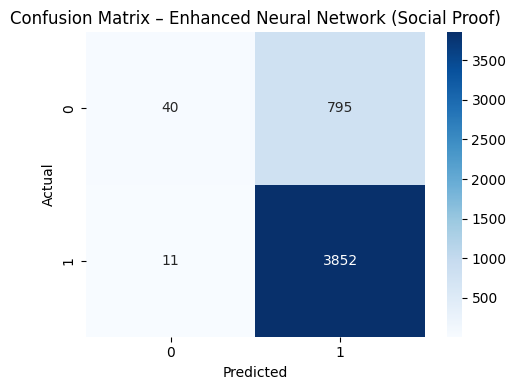


=== Enhanced Neural Network Evaluation – Social Proof Dataset ===
Training Time: 65.2142 seconds
Train Accuracy: 0.8267
Test Accuracy: 0.8284
Overfitting Gap: 0.0017


0            1  accuracy    macro avg  weighted avg
precision    0.784314     0.828922  0.828438     0.806618      0.820993
recall       0.047904     0.997152  0.828438     0.522528      0.828438
f1-score     0.090293     0.905288  0.828438     0.497791      0.760435
support    835.000000  3863.000000  0.828438  4698.000000   4698.000000

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_s.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

start_time = time.time()
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=30,
    batch_size=64,
    verbose=1)
train_time = time.time() - start_time

train_acc = model.evaluate(X_train_s, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test_s, y_test, verbose=0)[1]
overfit_gap = abs(train_acc - test_acc)

y_pred_probs = model.predict(X_test_s)
y_pred = (y_pred_probs > 0.5).astype(int)

report_df = pd.DataFrame(
    classification_report(y_test, y_pred, output_dict=True))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Enhanced Neural Network (Social Proof)")
plt.tight_layout()
plt.show()

print("\nEnhanced Neural Network Evaluation – Social Proof Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_30
Received: inputs=['Tensor(shape=(100, 4))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_30
Received: inputs=['Tensor(shape=(200, 4))']
  warnings.warn(msg)


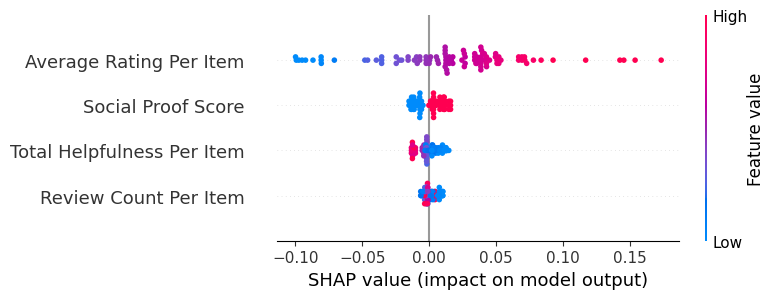

In [ ]:
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)
X_test_s_df  = pd.DataFrame(X_test_s,  columns=X.columns)

bg_n = min(100, len(X_train_s_df))
sm_n = min(100, len(X_test_s_df))
background = X_train_s_df.sample(bg_n, random_state=42).reset_index(drop=True)
X_sample   = X_test_s_df.sample(sm_n,  random_state=42).reset_index(drop=True)

explainer = shap.DeepExplainer(model, background.values)
shap_values = explainer.shap_values(X_sample.values)

shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
if shap_array.ndim == 3 and shap_array.shape[-1] == 1:
    shap_array = np.squeeze(shap_array, axis=-1)

shap.summary_plot(shap_array, X_sample, show=True)


# **Framing Bias**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("framing bias dataset feature engineered.csv")

In [ ]:
df.head()

Category  Units_Sold  Discount_Applied  Revenue  avg_price  \
0      Electronics         134              0.14   305.54   2.280149   
1  Home Appliances         109              0.30  1102.19  10.111835   
2             Toys         116              0.04   471.29   4.062845   
3         Clothing         125              0.20   980.26   7.842080   
4            Books         132              0.07   803.76   6.089091   

   discount_amount  category_avg_discount  relative_discount  high_revenue  
0         0.319221               0.150005          -0.010005             0  
1         3.033550               0.149167           0.150833             1  
2         0.162514               0.149679          -0.109679             1  
3         1.568416               0.149745           0.050255             1  
4         0.426236               0.150779          -0.080779             1

In [ ]:
df = df.rename(columns={"Units_Sold":"Units Sold", "Discount_Applied":"Discount Applied","avg_price":"Average Price", "discount_amount":"Discount Amount", "category_avg_discount": "Category Average Discount", "relative_discount":"Relative Discount", "high_revenue":"High Revenue"})

In [ ]:
df.head()

Category  Units Sold  Discount Applied  Revenue  Average Price  \
0      Electronics         134              0.14   305.54       2.280149   
1  Home Appliances         109              0.30  1102.19      10.111835   
2             Toys         116              0.04   471.29       4.062845   
3         Clothing         125              0.20   980.26       7.842080   
4            Books         132              0.07   803.76       6.089091   

   Discount Amount  Category Average Discount  Relative Discount  High Revenue  
0         0.319221                   0.150005          -0.010005             0  
1         3.033550                   0.149167           0.150833             1  
2         0.162514                   0.149679          -0.109679             1  
3         1.568416                   0.149745           0.050255             1  
4         0.426236                   0.150779          -0.080779             1

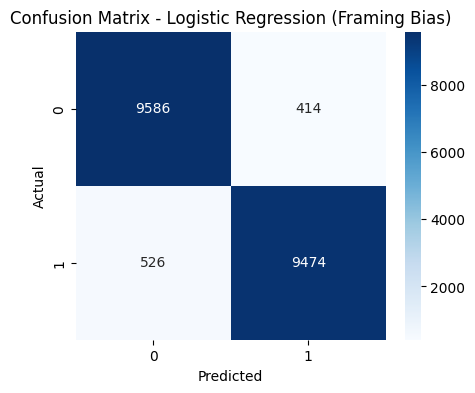

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


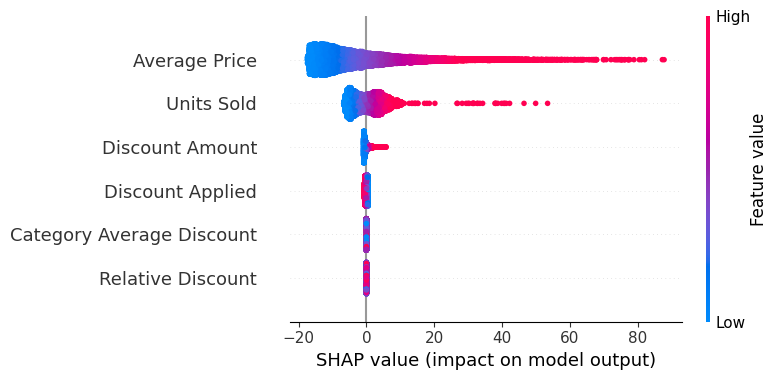


Logistic Regression Evaluation - Framing Bias Dataset
Training Time: 1.8640 seconds
Train Accuracy: 0.9509
Test Accuracy: 0.9530
Overfitting Gap: 0.0020


0             1  accuracy     macro avg  weighted avg
precision      0.947983      0.958131     0.953      0.953057      0.953057
recall         0.958600      0.947400     0.953      0.953000      0.953000
f1-score       0.953262      0.952735     0.953      0.952999      0.952999
support    10000.000000  10000.000000     0.953  20000.000000  20000.000000

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import shap

X = df.drop(columns=["Category", "High Revenue", "Revenue"])
y = df["High Revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

# Overfitting gap
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Framing Bias)")
plt.show()

# SHAP
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

print("\nLogistic Regression Evaluation - Framing Bias Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


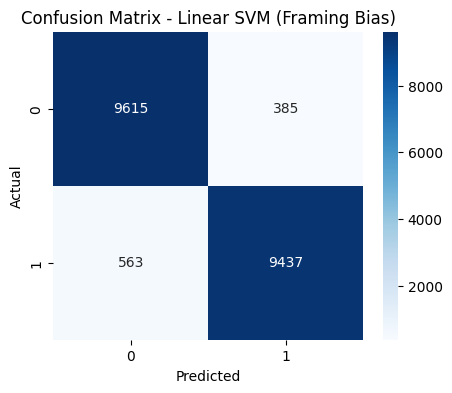

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


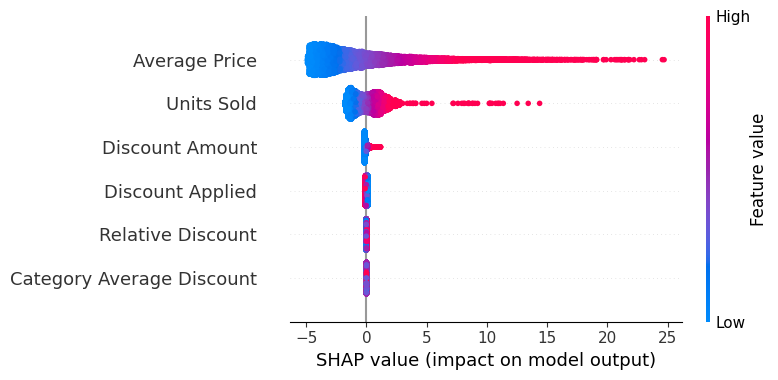


=== Linear SVM Evaluation - Framing Bias Dataset ===
Training Time: 1.6078 seconds
Train Accuracy: 0.9506
Test Accuracy: 0.9526
Overfitting Gap: 0.0020


0             1  accuracy     macro avg  weighted avg
precision      0.944685      0.960802    0.9526      0.952743      0.952743
recall         0.961500      0.943700    0.9526      0.952600      0.952600
f1-score       0.953018      0.952174    0.9526      0.952596      0.952596
support    10000.000000  10000.000000    0.9526  20000.000000  20000.000000

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import shap


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = LinearSVC(max_iter=5000, random_state=42)
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

# Overfitting gap
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM (Framing Bias)")
plt.show()

# SHAP values
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Output metrics
print("\n=== Linear SVM Evaluation - Framing Bias Dataset ===")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:31:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


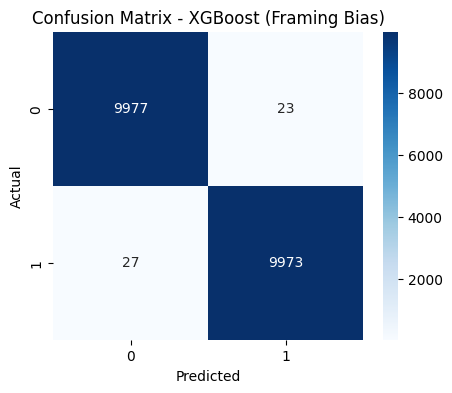

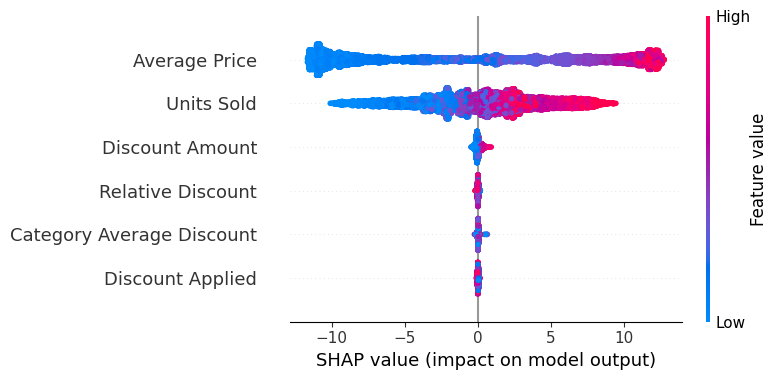


XGBoost Evaluation - Framing Bias Dataset
Training Time: 20.1990 seconds
Train Accuracy: 0.9994
Test Accuracy: 0.9975
Overfitting Gap: 0.0019


precision  recall  f1-score     support
0              0.997301  0.9977  0.997500  10000.0000
1              0.997699  0.9973  0.997499  10000.0000
accuracy       0.997500  0.9975  0.997500      0.9975
macro avg      0.997500  0.9975  0.997500  20000.0000
weighted avg   0.997500  0.9975  0.997500  20000.0000

In [ ]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss")
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True)).transpose()

# Overfitting gap
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost (Framing Bias)")
plt.show()

# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Output
print("\nXGBoost Evaluation - Framing Bias Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


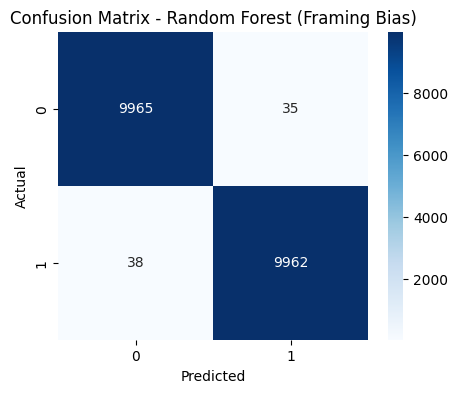

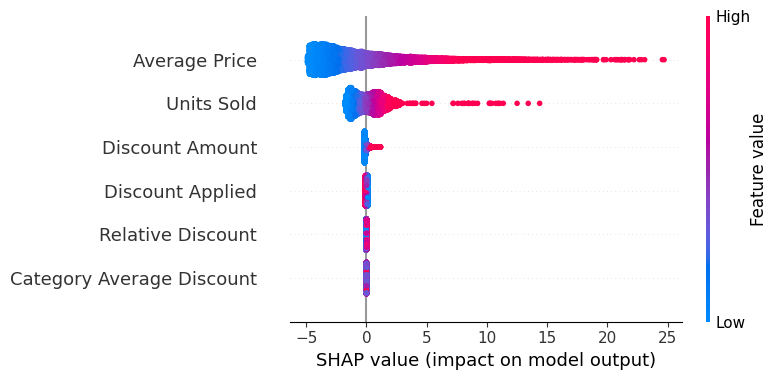


Random Forest Evaluation - Framing Bias Dataset
Training Time: 68.6945 seconds
Train Accuracy: 1.0000
Test Accuracy: 0.9963
Overfitting Gap: 0.0037


0             1  accuracy    macro avg  weighted avg
precision      0.996201      0.996499   0.99635      0.99635       0.99635
recall         0.996500      0.996200   0.99635      0.99635       0.99635
f1-score       0.996351      0.996349   0.99635      0.99635       0.99635
support    10000.000000  10000.000000   0.99635  20000.00000   20000.00000

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

start_time = time.time()
model = RandomForestClassifier(
    n_estimators=200, random_state=42)
model.fit(X_train, y_train)
train_time = time.time() - start_time

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

report_df = pd.DataFrame(
    classification_report(y_test, y_test_pred, output_dict=True))

# Overfitting gap
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
overfit_gap = abs(train_acc - test_acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Framing Bias)")
plt.show()

# SHAP
shap_values = explainer.shap_values(X_test)

# If shap_values is a list (older SHAP versions), select class 1
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values  # Already a NumPy array in new SHAP

# Plot summary
shap.summary_plot(shap_values_to_plot, X_test, feature_names=X.columns)

# Output
print("\nRandom Forest Evaluation - Framing Bias Dataset")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9375 - loss: 0.1741 - val_accuracy: 0.9907 - val_loss: 0.0292
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 0.9951 - val_loss: 0.0182
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9927 - val_loss: 0.0182
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9937 - loss: 0.0167 - val_accuracy: 0.9948 - val_loss: 0.0135
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9945 - loss: 0.0142 - val_accuracy: 0.9959 - val_loss: 0.0117
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9952 - loss: 0.0129 - val_accuracy: 0.9962 - val_loss: 0.0102
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9947 - loss: 0.0124 - val_accuracy: 0.9960 - val_loss: 0.0100
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9957 - loss: 0.0112 - val_ac

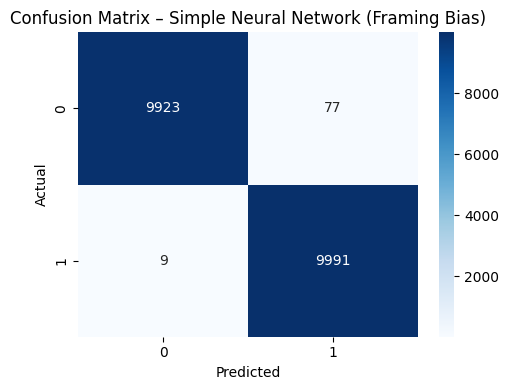


=== Simple Neural Network Evaluation – Framing Bias Dataset ===
Training Time: 217.1788s
Train Accuracy: 0.9965  |  Test Accuracy: 0.9957  |  Overfitting Gap: 0.0008


0             1  accuracy     macro avg  weighted avg
precision      0.999094      0.992352    0.9957      0.995723      0.995723
recall         0.992300      0.999100    0.9957      0.995700      0.995700
f1-score       0.995685      0.995715    0.9957      0.995700      0.995700
support    10000.000000  10000.000000    0.9957  20000.000000  20000.000000

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_s.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

start_time = time.time()
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=20,
    batch_size=32,
    verbose=1)
train_time = time.time() - start_time

train_acc = model.evaluate(X_train_s, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test_s, y_test, verbose=0)[1]
overfit_gap = abs(train_acc - test_acc)

# Predictions
y_pred_probs = model.predict(X_test_s)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_pred, output_dict=True))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Simple Neural Network (Framing Bias)")
plt.tight_layout()
plt.show()

# Output
print("\nSimple Neural Network Evaluation – Framing Bias Dataset")
print(f"Training Time: {train_time:.4f}s")
print(f"Train Accuracy: {train_acc:.4f}  |  Test Accuracy: {test_acc:.4f}  |  Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_4
Received: inputs=['Tensor(shape=(100, 6))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_4
Received: inputs=['Tensor(shape=(200, 6))']
  warnings.warn(msg)


SHAP shape: (100, 6), Input shape: (100, 6)


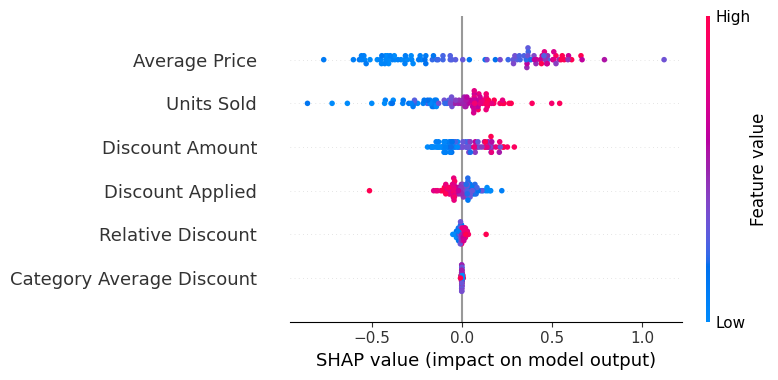

In [ ]:
import shap
import numpy as np
import pandas as pd

background = X_train_s[np.random.choice(X_train_s.shape[0], 100, replace=False)]
X_sample = X_test_s[np.random.choice(X_test_s.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_sample)

if isinstance(shap_values, list):
    shap_array = shap_values[0]
else:
    shap_array = shap_values

shap_array = np.squeeze(shap_array, axis=-1)

print(f"SHAP shape: {shap_array.shape}, Input shape: {X_sample.shape}")
assert shap_array.shape == X_sample.shape, "Mismatch between SHAP and input shapes!"

X_sample_df = pd.DataFrame(X_sample, columns=X.columns)

shap.summary_plot(shap_array, X_sample_df)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9201 - loss: 0.1789 - val_accuracy: 0.9919 - val_loss: 0.0350
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9696 - loss: 0.0797 - val_accuracy: 0.9876 - val_loss: 0.0338
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9753 - loss: 0.0616 - val_accuracy: 0.9904 - val_loss: 0.0293
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9802 - loss: 0.0523 - val_accuracy: 0.9911 - val_loss: 0.0227
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9808 - loss: 0.0493 - val_accuracy: 0.9928 - val_loss: 0.0224
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9823 - loss: 0.0450 - val_accuracy: 0.9902 - val_loss: 0.0252
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9836 - loss: 0.0417 - val_accuracy: 0.9936 - val_loss: 0.0221
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9846 - loss: 0.0376 - val

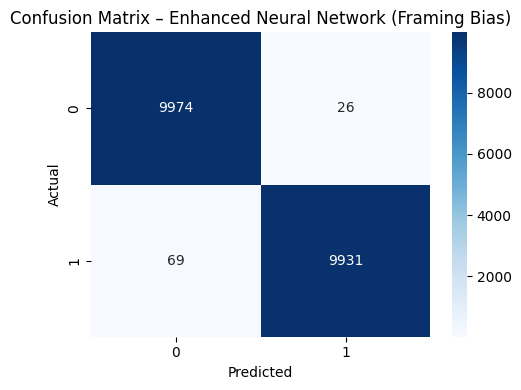


=== Enhanced Neural Network Evaluation – Framing Bias Dataset ===
Training Time: 482.1010s
Train Accuracy: 0.9954  |  Test Accuracy: 0.9952  |  Overfitting Gap: 0.0001


0             1  accuracy     macro avg  weighted avg
precision      0.99313      0.997389   0.99525      0.995259      0.995259
recall         0.99740      0.993100   0.99525      0.995250      0.995250
f1-score       0.99526      0.995240   0.99525      0.995250      0.995250
support    10000.00000  10000.000000   0.99525  20000.000000  20000.000000

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_s.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'])

start_time = time.time()
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_test_s, y_test),
    epochs=30,
    batch_size=32,
    verbose=1)
train_time = time.time() - start_time

train_acc = model.evaluate(X_train_s, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test_s, y_test, verbose=0)[1]
overfit_gap = abs(train_acc - test_acc)

# Predictions
y_pred_probs = model.predict(X_test_s)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
report_df = pd.DataFrame(
    classification_report(y_test, y_pred, output_dict=True))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Enhanced Neural Network (Framing Bias)")
plt.tight_layout()
plt.show()

# Output
print("\nEnhanced Neural Network Evaluation – Framing Bias Dataset")
print(f"Training Time: {train_time:.4f}s")
print(f"Train Accuracy: {train_acc:.4f}  |  Test Accuracy: {test_acc:.4f}  |  Overfitting Gap: {overfit_gap:.4f}")
display(report_df)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_8
Received: inputs=['Tensor(shape=(100, 6))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_8
Received: inputs=['Tensor(shape=(200, 6))']
  warnings.warn(msg)


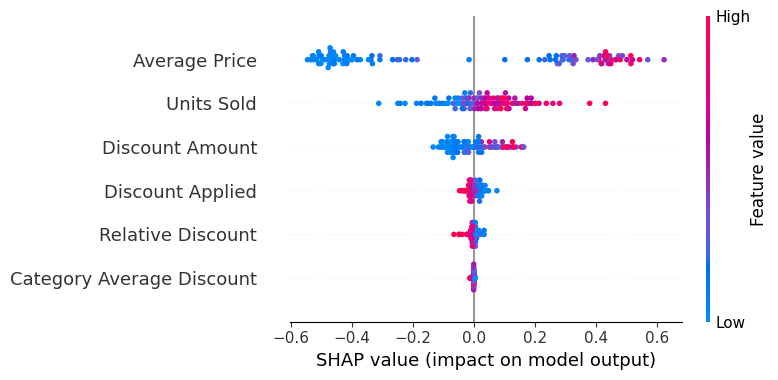

In [ ]:
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)
X_test_s_df  = pd.DataFrame(X_test_s,  columns=X.columns)

bg_n = min(100, len(X_train_s_df))
sm_n = min(100, len(X_test_s_df))
background = X_train_s_df.sample(bg_n, random_state=42).reset_index(drop=True)
X_sample   = X_test_s_df.sample(sm_n,  random_state=42).reset_index(drop=True)

explainer = shap.DeepExplainer(model, background.values)
shap_values = explainer.shap_values(X_sample.values)

shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
if shap_array.ndim == 3 and shap_array.shape[-1] == 1:
    shap_array = np.squeeze(shap_array, axis=-1)

shap.summary_plot(shap_array, X_sample, show=True)


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("Urgency Feature Engineered")


In [ ]:
data = data.iloc[:, 8:]

In [ ]:
data.head()

Holiday Purchase  Days to Nearest Holiday  Purchase Amount  \
0                 0                       43             9.99   
1                 0                       18            13.98   
2                 0                      299             7.98   
3                 0                       44            15.99   
4                 0                      140            22.99   

   High Value Purchase  Daily Volume  High Volume Day  Urgency Label  
0                    0           133                0              0  
1                    0            96                0              0  
2                    0            64                0              0  
3                    0            65                0              0  
4                    0            69                0              0

In [ ]:
corr_matrix = data.corr()
print(corr_matrix)

                         Holiday Purchase  Days to Nearest Holiday  \
Holiday Purchase                 1.000000                -0.147747   
Days to Nearest Holiday         -0.147747                 1.000000   
Purchase Amount                  0.020303                -0.001046   
High Value Purchase              0.022909                -0.003657   
Daily Volume                     0.200901                -0.201268   
High Volume Day                  0.185869                -0.205929   
Urgency Label                    0.232323                -0.157774   

                         Purchase Amount  High Value Purchase  Daily Volume  \
Holiday Purchase                0.020303             0.022909      0.200901   
Days to Nearest Holiday        -0.001046            -0.003657     -0.201268   
Purchase Amount                 1.000000             0.526825      0.029138   
High Value Purchase             0.526825             1.000000      0.026991   
Daily Volume                    0.029138    

/tmp/ipython-input-3885773433.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


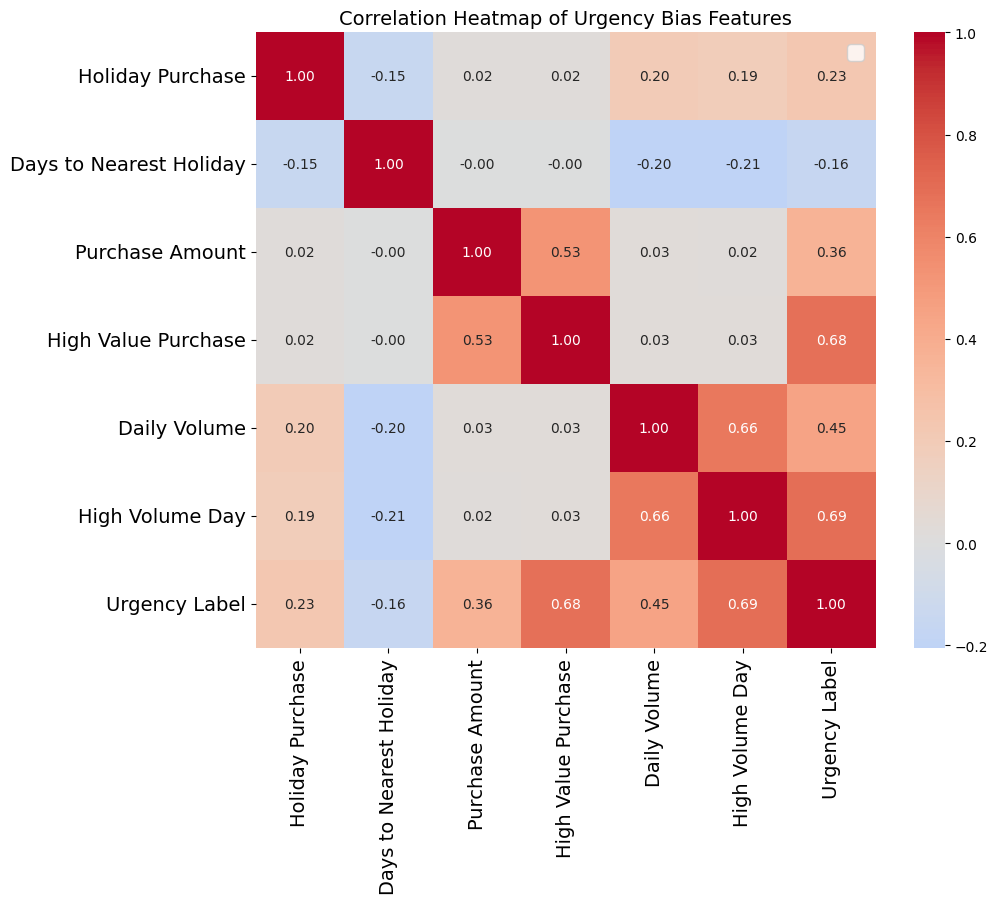

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Urgency Bias Features", fontsize=14)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
data = pd.read_csv("framing bias dataset feature engineered.csv")

In [ ]:
data.head()

Category  Units_Sold  Discount_Applied  Revenue  avg_price  \
0      Electronics         134              0.14   305.54   2.280149   
1  Home Appliances         109              0.30  1102.19  10.111835   
2             Toys         116              0.04   471.29   4.062845   
3         Clothing         125              0.20   980.26   7.842080   
4            Books         132              0.07   803.76   6.089091   

   discount_amount  category_avg_discount  relative_discount  high_revenue  
0         0.319221               0.150005          -0.010005             0  
1         3.033550               0.149167           0.150833             1  
2         0.162514               0.149679          -0.109679             1  
3         1.568416               0.149745           0.050255             1  
4         0.426236               0.150779          -0.080779             1

In [ ]:
data.drop(columns=["Revenue","Category"], inplace=True)

In [ ]:
data

Category  Units_Sold  Discount_Applied  avg_price  \
0          Electronics         134              0.14   2.280149   
1      Home Appliances         109              0.30  10.111835   
2                 Toys         116              0.04   4.062845   
3             Clothing         125              0.20   7.842080   
4                Books         132              0.07   6.089091   
...                ...         ...               ...        ...   
99995      Electronics         179              0.11   1.425196   
99996            Books         178              0.12   7.317978   
99997      Electronics         212              0.26   2.317736   
99998      Electronics         180              0.09   3.327278   
99999             Toys         157              0.20   1.326561   

       discount_amount  category_avg_discount  relative_discount  high_revenue  
0             0.319221               0.150005          -0.010005             0  
1             3.033550               0.149167           0.150833             1  
2             0.162514               0.149679          -0.109679             1  
3             1.568416               0.149745           0.050255             1  
4             0.426236               0.150779          -0.080779             1  
...                ...                    ...                ...           ...  
99995         0.156772               0.150005          -0.040005             0  
99996         0.878157               0.150779          -0.030779             1  
99997         0.602611               0.150005           0.109995             1  
99998         0.299455               0.150005          -0.060005             1  
99999         0.265312               0.149679           0.050321             0  

[100000 rows x 8 columns]

In [ ]:
data = data.rename(columns={"Units_Sold":"Units Sold", "Discount_Applied":"Discount Applied","avg_price":"Average Price", "discount_amount":"Discount Amount", "category_avg_discount": "Category Average Discount", "relative_discount":"Relative Discount", "high_revenue":"High Revenue"})

In [ ]:
data

Units Sold  Discount Applied  Average Price  Discount Amount  \
0             134              0.14       2.280149         0.319221   
1             109              0.30      10.111835         3.033550   
2             116              0.04       4.062845         0.162514   
3             125              0.20       7.842080         1.568416   
4             132              0.07       6.089091         0.426236   
...           ...               ...            ...              ...   
99995         179              0.11       1.425196         0.156772   
99996         178              0.12       7.317978         0.878157   
99997         212              0.26       2.317736         0.602611   
99998         180              0.09       3.327278         0.299455   
99999         157              0.20       1.326561         0.265312   

       Category Average Discount  Relative Discount  High Revenue  
0                       0.150005          -0.010005             0  
1                       0.149167           0.150833             1  
2                       0.149679          -0.109679             1  
3                       0.149745           0.050255             1  
4                       0.150779          -0.080779             1  
...                          ...                ...           ...  
99995                   0.150005          -0.040005             0  
99996                   0.150779          -0.030779             1  
99997                   0.150005           0.109995             1  
99998                   0.150005          -0.060005             1  
99999                   0.149679           0.050321             0  

[100000 rows x 7 columns]

In [ ]:
data = pd.read_csv("social proof bias with feature engineering.csv")

In [ ]:
data.head()

Clothing ID                                        Review Text  \
0          767  Absolutely wonderful - silky and sexy and comf...   
1         1080  Love this dress!  it's sooo pretty.  i happene...   
2         1077  I had such high hopes for this dress and reall...   
3         1049  I love, love, love this jumpsuit. it's fun, fl...   
4          847  This shirt is very flattering to all due to th...   

   avg_rating_per_item  review_count_per_item  total_helpfulness_per_item  \
0             4.500000                      2                           0   
1             4.294118                    289                         849   
2             4.084175                    297                         702   
3             4.312500                     32                          90   
4             4.000000                      4                           8   

   social_proof_score  Recommended IND  
0            0.875978                1  
1            1.412329                1  
2            1.314460                0  
3            0.891001                1  
4            0.755828                1

In [ ]:
data = data.rename(columns={
    "avg_rating_per_item": "Average Rating Per Item",
    "review_count_per_item": "Review Count Per Item",
    "total_helpfulness_per_item": "Total Helpfulness Per Item",
    "social_proof_score": "Social Proof Score"
})


In [ ]:
data.head()

Clothing ID                                        Review Text  \
0          767  Absolutely wonderful - silky and sexy and comf...   
1         1080  Love this dress!  it's sooo pretty.  i happene...   
2         1077  I had such high hopes for this dress and reall...   
3         1049  I love, love, love this jumpsuit. it's fun, fl...   
4          847  This shirt is very flattering to all due to th...   

   Average Rating Per Item  Review Count Per Item  Total Helpfulness Per Item  \
0                 4.500000                      2                           0   
1                 4.294118                    289                         849   
2                 4.084175                    297                         702   
3                 4.312500                     32                          90   
4                 4.000000                      4                           8   

   Social Proof Score  Recommended IND  
0            0.875978                1  
1            1.412329                1  
2            1.314460                0  
3            0.891001                1  
4            0.755828                1

In [ ]:
data = data.drop(columns=["Clothing ID", "Review Text"])

/tmp/ipython-input-3994374625.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


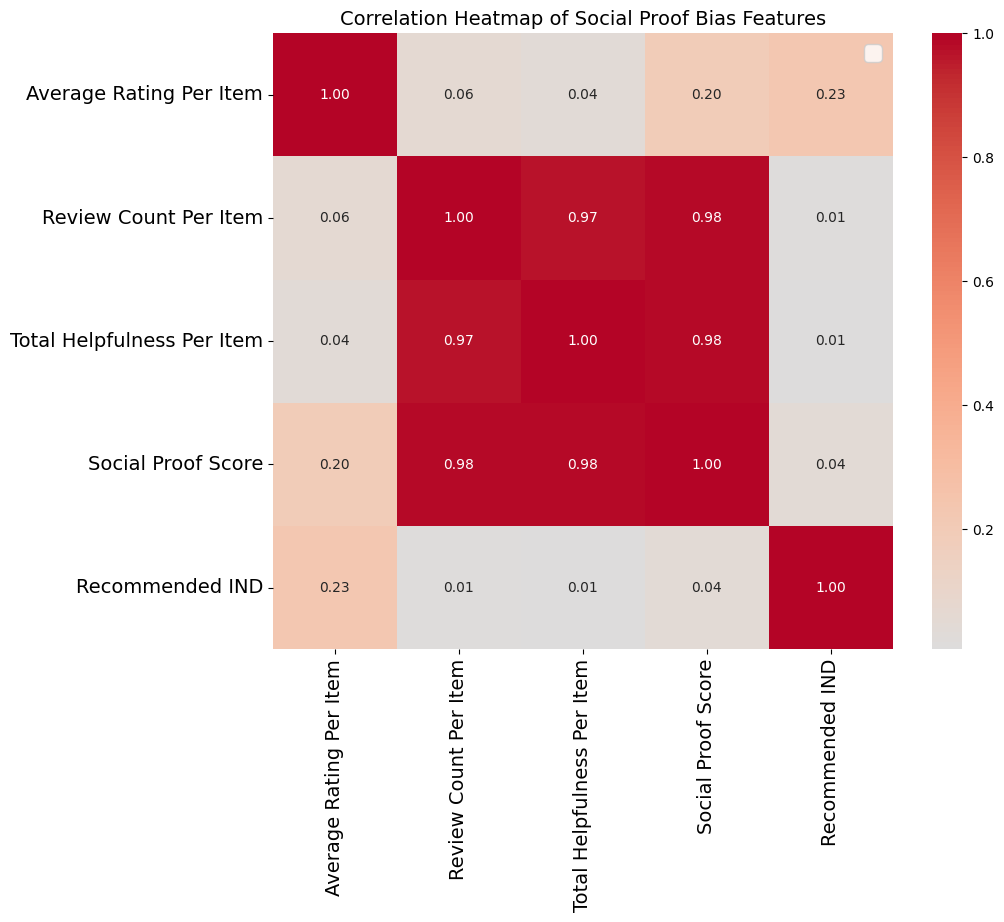

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Social Proof Bias Features", fontsize=14)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

/tmp/ipython-input-2066789086.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


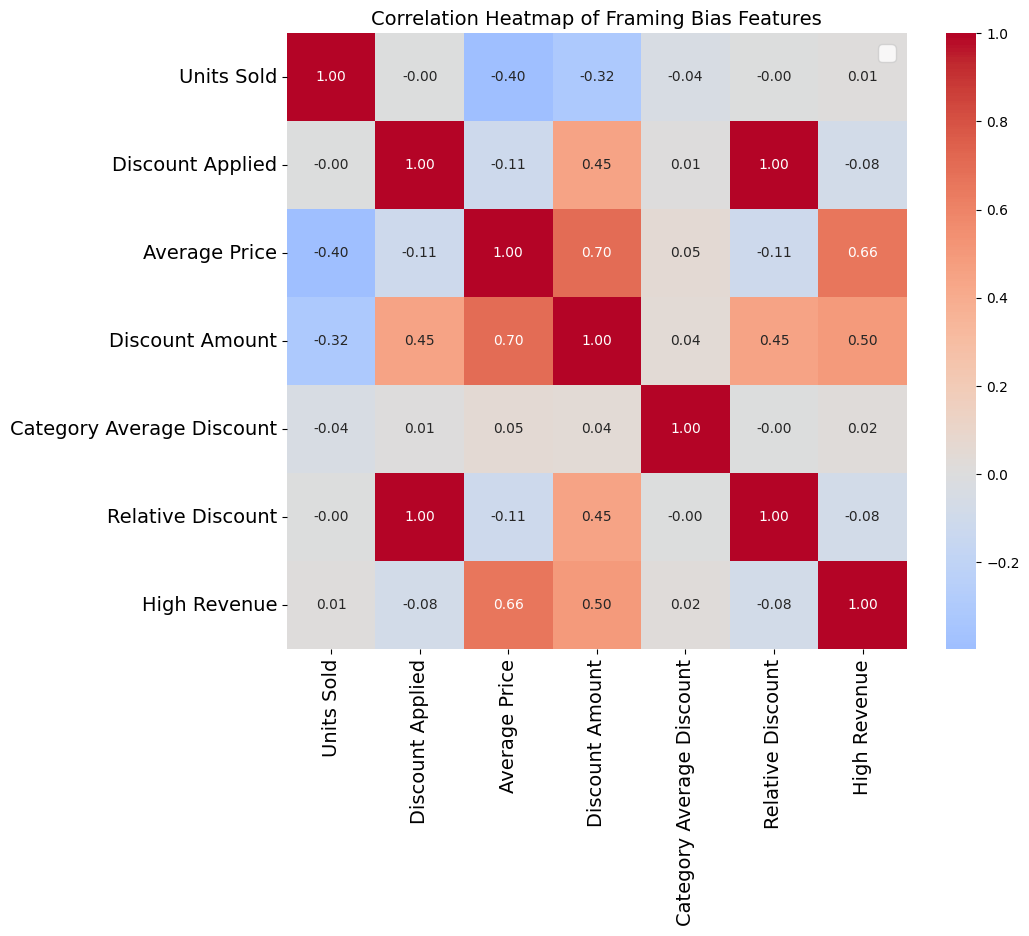

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Framing Bias Features", fontsize=14)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("social proof.csv")

In [ ]:
data.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

/tmp/ipython-input-3951777273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


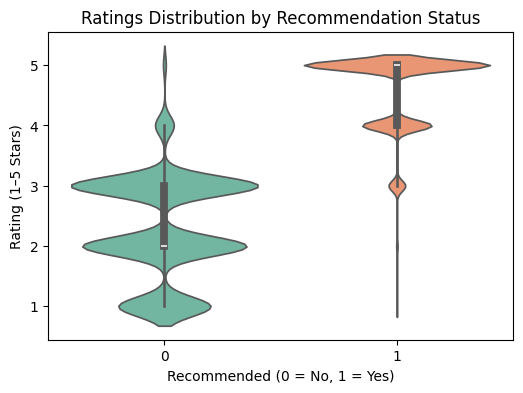

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.violinplot(
    x="Recommended IND",
    y="Rating",
    data=data,
    palette="Set2",
    inner="box")

plt.title("Ratings Distribution by Recommendation Status")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Rating (1–5 Stars)")
plt.show()


/tmp/ipython-input-3921056675.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Recommended IND", "Feedback Bin"])


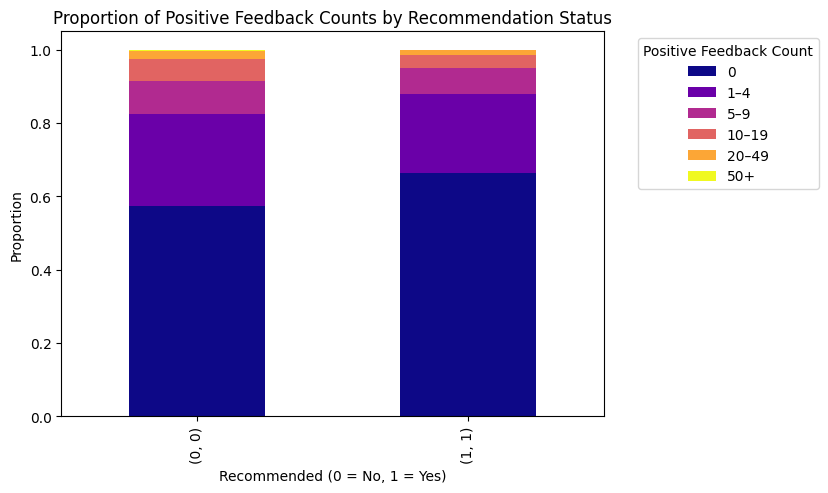

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 1, 5, 10, 20, 50, data["Positive Feedback Count"].max()]
labels = ["0", "1–4", "5–9", "10–19", "20–49", "50+"]

data["Feedback Bin"] = pd.cut(
    data["Positive Feedback Count"], bins=bins, labels=labels, include_lowest=True)

feedback_prop = (
    data.groupby(["Recommended IND", "Feedback Bin"])
        .size()
        .groupby(level=0)
        .apply(lambda x: x / x.sum())
        .unstack(fill_value=0))

feedback_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(7,5),
    colormap="plasma")

plt.title("Proportion of Positive Feedback Counts by Recommendation Status")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(title="Positive Feedback Count", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv("framing")

In [ ]:
data.head()

Transaction_ID     Customer_ID   Product_ID  \
0  8b460852-7c64-46fa-998b-b0976879d082     Customer_65  Product_224   
1  418612e7-8744-4ba3-bb0c-105b47e2a968   Customer_1910  Product_584   
2  5bc3b98f-cb0c-4b12-947c-df8bbb35a73e   Customer_2306  Product_374   
3  28fb67c8-e8c0-447a-841c-f760730de0eb  Customer_17206  Product_220   
4  8bee087a-a8a9-45bb-89d7-04d1710f1b00  Customer_16033  Product_358   

  Transaction_Date  Units_Sold  Discount_Applied  Revenue  Clicks  \
0       2024-10-06         134              0.14   305.54      11   
1       2024-10-29         109              0.30  1102.19      15   
2       2024-04-04         116              0.04   471.29      16   
3       2024-08-25         125              0.20   980.26      12   
4       2024-05-05         132              0.07   803.76      44   

   Impressions  Conversion_Rate         Category         Region  Ad_CTR  \
0           65             0.17      Electronics         Europe  0.0180   
1          201             0.07  Home Appliances           Asia  0.1589   
2          199             0.08             Toys           Asia  0.0596   
3          355             0.03         Clothing         Europe  0.0444   
4          355             0.12            Books  North America  0.1270   

   Ad_CPC  Ad_Spend  
0    0.55      9.90  
1    0.40     63.56  
2    1.50     89.40  
3    0.44     19.54  
4    0.53     67.31

/tmp/ipython-input-2242579032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_discount = data.groupby("Discount Bin")["Revenue"].mean().reset_index()


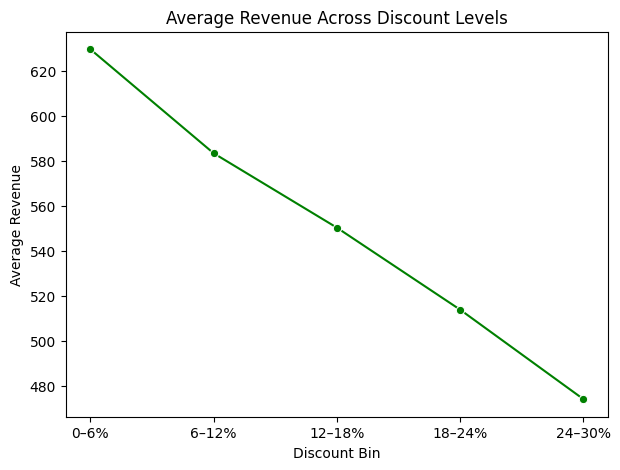

/tmp/ipython-input-2446461005.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Discount Bin", as_index=False)["Impressions"].mean()


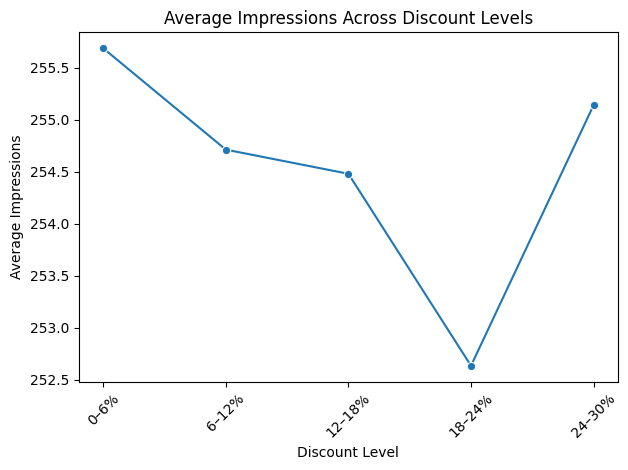

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

disc = pd.to_numeric(data["Discount_Applied"], errors="coerce").clip(lower=0)

for q in [5, 4, 3]:
    try:
        cats, edges = pd.qcut(disc, q=q, retbins=True, duplicates="drop")
        break
    except ValueError:
        continue

labels = [f"{int(round(edges[i]*100))}–{int(round(edges[i+1]*100))}%"
          for i in range(len(edges)-1)]
data["Discount Bin"] = pd.cut(disc, bins=edges, labels=labels, include_lowest=True)

impr_by_disc = (
    data.groupby("Discount Bin", as_index=False)["Impressions"].mean()
    .sort_values("Discount Bin"))

# Plot
sns.lineplot(x="Discount Bin", y="Impressions", data=impr_by_disc, marker="o")
plt.title("Average Impressions Across Discount Levels")
plt.xlabel("Discount Level")
plt.ylabel("Average Impressions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


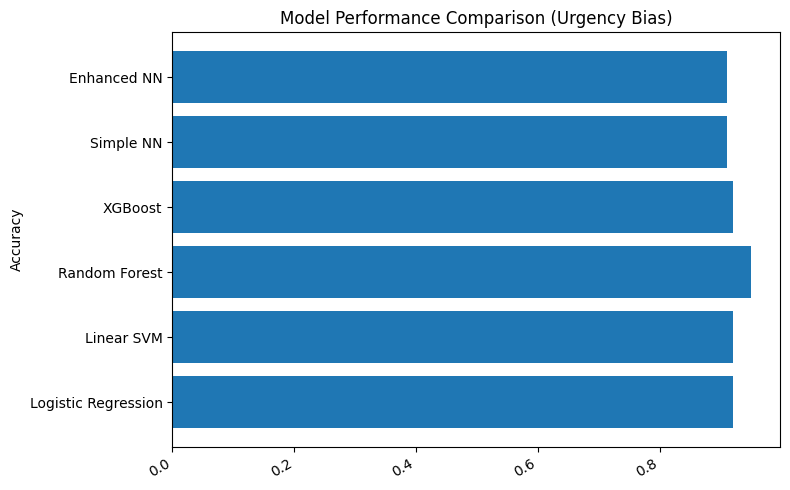

In [ ]:
import matplotlib.pyplot as plt

models = [
    "Logistic Regression",
    "Linear SVM",
    "Random Forest",
    "XGBoost",
    "Simple NN",
    "Enhanced NN"]

accuracy = [0.92, 0.92, 0.95, 0.92, 0.91, 0.91]  # replace with your values

plt.figure(figsize=(8, 5))
bars = plt.barh(models, accuracy)


plt.ylabel("Accuracy")
plt.title("Model Performance Comparison (Urgency Bias)")
plt.xticks(rotation=30, ha="right")


plt.tight_layout()
plt.show()
